In [ ]:
# Romain THOMAS

# EXAM

**Objective:** classify the tweets about Corona Virus as positive or negative; in the dataset there are 5 classes: `'Extremely Negative', 'Extremely Positive', 'Negative', 'Neutral', 'Positive'`, you will have to eliminate neutral and convert the rest into positive and negative.

1. Exploratory Data Analsis (EDA): look closely at you data, the text, the target, any null values, any imbalance, non-numerical data to be converted (in data and target)?, etc.
2. Split the train set into Training & Validation sets (0.75, 0.25), the test set is a separate file here. NB: if you do crossvalidation, you must not split the train into train & validation.
3. Clean Textual Data
4. Vectorize Texts (one hot encoder, tfidf, embeddings (word2vec with gensim, ELMO, BERT, GPT, etc.))
5. ML Classification model(s) or DL model or an ensemble of several ML/DL or both ML and DL models
6. Choose and justify the choice of the evaluation metric
7. Hyperparameter optimization (Cross validation - hyperopt - Gridsearch)
8. Evaluate on Test set
9. Use Lime to explain one text classification (from the test set)
10. Use Shapley to explain globally the text classification on the test set

**Comment all your steps: justify your choices, analyze the results (whether positive or negative), and finally conclude by suggesting improvements and making recommendations.**

You can use one notebook for all your work or seperate the EDA from the training and finally the testing and interpretability. <br>
You can also use .py scripts (classes/functions) and initialize/call them from the notebook. <br>

The goal is to check that you understood how does an NLP data science project starts. <br>
you will be evaluated on the methods used and **the comments and analysis** you will provide. <br>
Bad test performance will not influence your grade as long as you propose improvements and elaborate on the reasons you think might have influenced this bad results. <br>

**NB:**
- Imbalance can be fixed by Over/Under sampling and Data Augmentation.<br> Using Textual Data Augmentation techniques (libraries like textattack.augmentation, NLPAug, backtranslations, etc.,) would be a bonus if used.
- Another bonus is granted if you keep the problem a multi-class classification instead of a binary one; the classes woul be:`'Extremely Negative', 'Extremely Positive', 'Negative', 'Neutral', 'Positive'`

I have already started the EDA section for you.


In [1]:
#!pip install wordninja
#!pip install imblearn
#!pip install nlpaug

In [2]:
#!pip install wget

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import torch

import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from string import digits
import nltk
import wordninja

C:\Users\romai\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd # to work with csv files

# matplotlib imports are used to plot confusion matrices for the classifiers
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt

# import feature extraction methods from sklearn
from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.feature_extraction import stop_words
import sklearn.feature_extraction._stop_words as stop_words

# pre-processing of text
import string
import re

# import classifiers from sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

# import different metrics to evaluate the classifiers
from sklearn.metrics import accuracy_score

# from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# import time function from time module to track the training duration
from time import time

In [5]:
#basic imports
import warnings
warnings.filterwarnings('ignore')
import os
import wget
import gzip
import shutil
from time import time

#pre-processing imports
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation

#imports related to modeling
import numpy as np
import gensim.downloader
from gensim.models import Word2Vec, KeyedVectors
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\romai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\romai\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
import os, sys, numpy as np, pandas as pd
from zipfile import ZipFile
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding, LSTM
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.initializers import Constant

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
# specify GPU device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
if torch.cuda.is_available():
    n_gpu = torch.cuda.device_count()
    torch.cuda.get_device_name(0)
print(device)

cuda


from google.colab import drive
drive.mount('/content/drive')

# 1. Exploratory Data Analysis

In [9]:
train_df = pd.read_csv('Corona_NLP_train.csv', encoding='latin')

In [10]:
train_df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [11]:
train_df = train_df[['OriginalTweet', 'Sentiment']]

In [12]:
train_df.isnull().sum()

OriginalTweet    0
Sentiment        0
dtype: int64

In [13]:
"""
We can see there is no Nan
"""

'\nWe can see there is no Nan\n'

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   OriginalTweet  41157 non-null  object
 1   Sentiment      41157 non-null  object
dtypes: object(2)
memory usage: 643.2+ KB


In [15]:
# Converting into correct data type

train_df[["OriginalTweet"]] = train_df[["OriginalTweet"]].astype("str")
train_df[["Sentiment"]] = train_df[["Sentiment"]].astype("category")

In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   OriginalTweet  41157 non-null  object  
 1   Sentiment      41157 non-null  category
dtypes: category(1), object(1)
memory usage: 362.1+ KB


In [17]:
train_df.describe()

,OriginalTweet,Sentiment
count,41157,41157
unique,41157,5
top,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Positive
freq,1,11422


In [18]:
"""
We can see that there is no duplicates
"""

'\nWe can see that there is no duplicates\n'

In [19]:
sentiment_counts = train_df.Sentiment.value_counts()
sentiment_counts

Sentiment
Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: count, dtype: int64

In [20]:
set(train_df.Sentiment)

{'Extremely Negative', 'Extremely Positive', 'Negative', 'Neutral', 'Positive'}

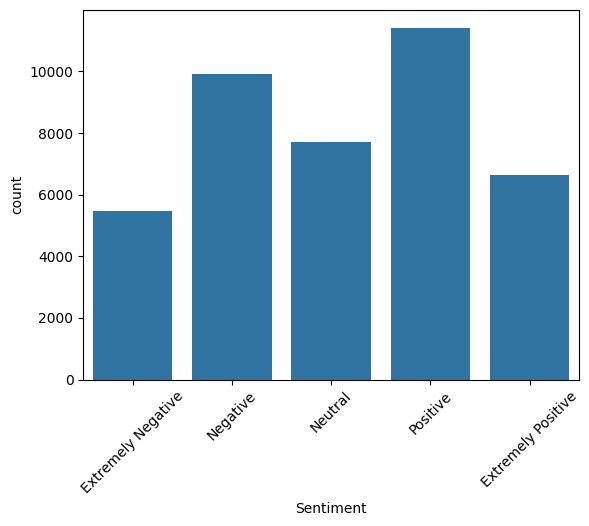

In [21]:
order = ['Extremely Negative', 'Negative', 'Neutral', 'Positive', 'Extremely Positive']

# Plot the countplot with the specified order
sns.countplot(x=train_df.Sentiment, order=order)

plt.xticks(rotation=45)  # Adjust the rotation angle as needed

plt.show()

In [22]:
"""
The distribution does not follow a standard distribution like Normal distribution for example

It would have been logical that Neutral is the top 1 but it is only the 3d.

It seems most of the poeple's tweeting express a real conviction.

Similarly it would have been logical for the 2 Extremes to be the least: it is the case.
But still with a good amount of counts: almost as much as the Neutral for Extremely Positive.

"""

"\nThe distribution does not follow a standard distribution like Normal distribution for example\n\nIt would have been logical that Neutral is the top 1 but it is only the 3d.\n\nIt seems most of the poeple's tweeting express a real conviction.\n\nSimilarly it would have been logical for the 2 Extremes to be the least: it is the case.\nBut still with a good amount of counts: almost as much as the Neutral for Extremely Positive.\n\n"

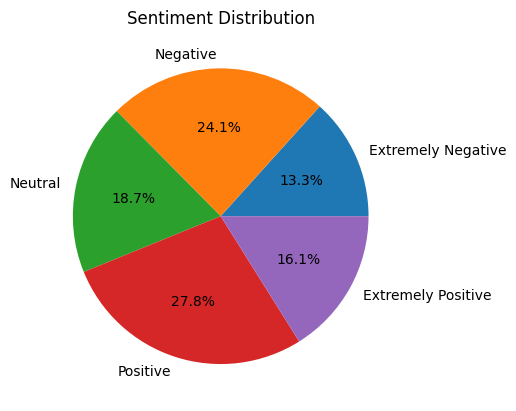

In [23]:
# Sort the counts based on the specified order
sentiment_counts_ordered = sentiment_counts.reindex(order)

# Plot the pie chart with ordered slices
plt.pie(sentiment_counts_ordered, labels=sentiment_counts_ordered.index, autopct='%1.1f%%')

# Add a title
plt.title('Sentiment Distribution')

# Show the plot
plt.show()

In [24]:
"""
The dataset is not well balanced.

There are 5 categories but:
- more than 1/4 is "Positive"
- a bit less than 1/4 is "Negative"
- "Neutral" and "Extremely Positive" are almost the same with roughly 17%
- "Extremely Negative" is the last with 13%

However the first to be twice the least in term of counts,
the dataset is not super highly imbalanced (like for fraud detection for example: less than 5% to less than 1%)
"""

'\nThe dataset is no well balanced.\n\nThere are 5 categories but:\n- more than 1/4 is "Positive"\n- a bit less than 1/4 is "Negative"\n- "Neutral" and "Extremely Positive" are almost the same with roughly 17%\n- "Extremely Negative" is the last with 13%\n\nHowever the first to be twice the least in term of counts,\nthe dataset is not highly imbalanced (like for fraud detection for example: less than 5% to less than 1%)\n'

In [25]:
for n, t in enumerate(train_df["OriginalTweet"].head(200)):
    print("\n-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #"+str(n))
    display(t)


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #0


'@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #1


'advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #2


'Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #3


"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j"


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #4


"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n"


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #5


'As news of the regionÂ\x92s first confirmed COVID-19 case came out of Sullivan County last week, people flocked to area stores to purchase cleaning supplies, hand sanitizer, food, toilet paper and other goods, @Tim_Dodson reports https://t.co/cfXch7a2lU'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #6


'Cashier at grocery store was sharing his insights on #Covid_19 To prove his credibility he commented "I\'m in Civics class so I know what I\'m talking about". https://t.co/ieFDNeHgDO'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #7


"Was at the supermarket today. Didn't buy toilet paper. #Rebel\r\r\n\r\r\n#toiletpapercrisis #covid_19 https://t.co/eVXkQLIdAZ"


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #8


'Due to COVID-19 our retail store and classroom in Atlanta will not be open for walk-in business or classes for the next two weeks, beginning Monday, March 16.  We will continue to process online and phone orders as normal! Thank you for your understanding! https://t.co/kw91zJ5O5i'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #9


"For corona prevention,we should stop to buy things with the cash and should use online payment methods because corona can spread through the notes. Also we should prefer online shopping from our home. It's time to fight against COVID 19?. #govindia #IndiaFightsCorona"


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #10


"All month there hasn't been crowding in the supermarkets or restaurants, however reducing all the hours and closing the malls means everyone is now using the same entrance and dependent on a single supermarket. #manila #lockdown #covid2019 #Philippines https://t.co/HxWs9LAnF9"


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #11


'Due to the Covid-19 situation, we have increased demand for all food products. \r\r\n\r\r\nThe wait time may be longer for all online orders, particularly beef share and freezer packs. \r\r\n\r\r\nWe thank you for your patience during this time.'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #12


'#horningsea is a caring community. LetÂ\x92s ALL look after the less capable in our village and ensure they stay healthy. Bringing shopping to their doors, help with online shopping and self isolation if you have symptoms or been exposed to somebody who has. https://t.co/lsGrXXhjhh'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #13


"Me: I don't need to stock up on food, I'll just have Amazon deliver whatever I need #CoronaVirus\r\r\n\r\r\nAmazon: https://t.co/8YWaKFjExC"


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #14


'ADARA Releases COVID-19 Resource Center for Travel Brands: Insights Help Travel Brands Stay Up-To-Date on Consumer Travel Behavior Trends https://t.co/PnA797jDKV https://t.co/dQox6uSihz'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #15


'Lines at the grocery store have been unpredictable, but is eating out a safe alternative? \r\r\n\r\r\nFind out more about whether you should be avoiding restaurants right now:  https://t.co/9idZSis5oQ\r\r\n\r\r\n#coronavirus #covid19 https://t.co/ZHbh898lf6'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #16


'????? ????? ????? ????? ??\r\r\n?????? ????? ??????? ????????? ?\r\r\n#????_???? ????? ???? ?????? ? #????????? ?????? ?? 13 ???? ?? ?? ???? ?????? ?? ??\r\r\n#???_???????? ????? ??? ???? ? https://t.co/51bL8P6vZh'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #17


'@eyeonthearctic 16MAR20 Russia consumer surveillance watchdog reported case in high Arctic where a man who traveled to Iran has COVID-19 and 101 are "observed"\r\r\nhttps://t.co/4WnrrK9oKC https://t.co/ld05k5Eyns'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #18


'Amazon Glitch Stymies Whole Foods, Fresh Grocery Deliveries\r\r\nÂ\x93As COVID-19 has spread, weÂ\x92ve seen a significant increase in people shopping online for groceries,Â\x94 a spokeswoman said in a statement. Â\x93Today this resulted in a systems impact affecting our ...\r\r\n https://t.co/TbzZ2MC3b3'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #19


"For those who aren't struggling, please consider donating to a food bank or a nonprofit. The demand for these services will increase as COVID-19 impacts jobs, and people's way of life."


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #20


'with 100  nations inficted with  covid  19  the world must  not  play fair with china  100 goverments must demand  china  adopts new guilde  lines on food safty  the  chinese  goverment  is guilty of  being  irosponcible   with life  on a global scale'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #21


'https://t.co/AVKrR9syff\r\r\n\r\r\nThe COVID-19 coronavirus pandemic is impacting consumer shopping behavior, purchase decisions and retail sales, according to a First Insight study.'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #22


'We have AMAZING CHEAP DEALS! FOR THE #COVID2019 going on to help you???\r\r\n#Trials\r\r\n#Monthly\r\r\n#Yearly \r\r\nAnd Resonable #Prices / #Subscriptions\r\r\nJust DM US! #bestiptv #iptv #Service #Iptv #iptvdeals #Cheap #ipTV #Football #HD #Movies #Adult #Cinema #hotmovies #iptvnew #iptv2020 #Adult'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #23


'We have AMAZING CHEAP DEALS! FOR THE #COVID2019 going on to help you???\r\r\n#Trials\r\r\n#Monthly\r\r\n#Yearly \r\r\nAnd Resonable #Prices / #Subscriptions\r\r\nJust DM US! #bestiptv #iptv #Service #Iptv #iptvdeals #Cheap #ipTV #Football #HD #Movies #Adult #Cinema #hotmovies #ipTv IPTVLinks #18Movies'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #24


'@10DowningStreet @grantshapps what is being done to ensure food and other essential products are being re-stocked at supermarkets and panic buying actively discouraged? It cannot be left to checkout staff to police the actions of the selfish and profiteer'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #25


"UK #consumer poll indicates the majority expect #covid19's impact to last 4-12 months (at 12 March). We expect this to increase at the next #tracker... See full results of the @RetailX Coronavirus Consumer Confidence Tracker here: https://t.co/K3uJlcjqDB https://t.co/9G3kgqIXJ8"


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #26


'In preparation for higher demand and a potential food shortage, The Hunger Coalition purchased 10 percent more food and implemented new protocols due to the COVID-19 coronavirus. https://t.co/5CecYtLnYn'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #27


'This morning I tested positive for Covid 19. I feel ok, I have no symptoms so far but have been isolated since I found out about my possible exposure to the virus.  Stay home people and be pragmatic. I will keep you updated on how IÂ\x92m doing ???? No panic. https://t.co/Lg7HVMZglZ'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #28


'Do you see malicious price increases in NYC? The NYC Department of Consumer and Worker Protection (DCWP) has set up a page to digitally file a complaint. Click here: https://t.co/oEx6Y8mm2K\r\r\n\r\r\nTo file a complaint (use the word"Overcharge") https://t.co/MdMmoBttOP\r\r\n#COVID19 #CovidNYC'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #29


'@7SealsOfTheEnd Soon with dwindling supplies unlawful Panicky people will be breaking into Closed Stores &amp; Supermarkets to Raid them as they normally do during a Crisis so massive as the #Coronavirus\r\r\n\r\r\n#StockUp&amp;LockUp'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #30


'There Is of in the Country  The more empty shelves people see the more buying ensues the more food is out of stock'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #31


"'Hole' Foods...\r\r\n\r\r\n...images from the nicest grocery store in one of the richest neighborhoods in the United States.\r\r\n\r\r\nhttps://t.co/WnQSoMtkVI\r\r\n\r\r\n#BreakingNews #Breaking #Coronavirus #CoronavirusOutbreak #COVID19 #COVID?19 #COVID_19 #COVID2019 #Collapse"


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #32


'Retail store closures could explode because of the #coronavirus (via @CNBC). #BrickAndMortar\r\r\n\r\r\nhttps://t.co/hQrYRNXFhv https://t.co/g5UZn06gb6'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #33


'Coronavirus fun fact: if you cough at the grocery store, you get the whole aisle to yourself pretty quickly.\r\r\n#CoronavirusOutbreak #coronavirus #COVID2019'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #34


"We're sorry to say that our @FinFabUK event is being cancelled due to Covid-19. The health and wellbeing of our attendees, speakers and staff is our top priority. Apologies for any disappointment this may cause. All FAQs are answered in the link below:\r\r\nhttps://t.co/GDDPTudCvj"


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #35


'Went to the supermarket yesterday and the toilet paper was gone. Has this anything to do with the Corona virus? #COVID2019'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #36


"Yes, buy only what you need.\r\r\n\r\r\nBut what's the point of posting photos of those people in the supermarket with a load of stuff? They could be buying for all their elderly parents, kids, siblings, etc who can't buy for themselves\r\r\n\r\r\nNot everything needs to be viral, Covid-19 alr is"


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #37


'Worried about the impact of the current COVID-19 pandemic on your finances? WeÂ\x92ve just published some tips to help you manage your money during these challenging times. #COVID19 https://t.co/3jKK3CqXfQ https://t.co/EbEnURmmJS'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #38


"my wife works retail&amp;a customer came in yesterday, coughing everywhere, saying they have CoVid-19. They requested a deep clean of the store - her company objected to due to cost, recommending the team spray disinfectant&amp;clean themselves. we're gonna die/get sick due to capitalism"


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #39


'Now I can go to the supermarket like this without being judged! ? #CoronavirusOutbreak #COVID2019 https://t.co/krTCGiUHQS'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #40


"We're here to provide a safe shopping experience for our customers and a healthy environment for our associates and community!\r\r\nOnline orders can be placed here: https://t.co/dCSXHUj3U0\r\r\n\r\r\n#jlmco #jlmcobrand #coronapocolypse #coronavirus #CoronavirusOutbreak  #COVID19 #shoponline https://t.co/riNKwskeRS"


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #41


"Curious,  do we think retail shoppers will do a lot of online shopping bc they're home and unable to go out or do we think everyone is too spooked to get that extra pair of shoes? #economy #onlineshopping #coronavirus #covid19 #stayhome"


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #42


'CHECK VIDEO ?? https://t.co/1ksn9Brl02 ??No food ? in USA market due to coronavirus panic we gonna die from starvation #CoronavirusOutbreak #coronavirus #houston #nofood #Notoiletpaper #NoHandShakes #nohandsanitizer #COVID19 #pandemic #totallockdown #COVID2019usa #walmart https://t.co/ztN3iMkgpD'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #43


'Breaking Story: Online clothes shopping rises as people find mysterious white patches forming on clothes. #QuarantineLife #CoronavirusOutbreak #coronavirus #IMadeThisUp #FakeNews https://t.co/5Z24hptT9M'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #44


'This is the line outside  @Target  in as customers wait for the store to open this morning'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #45


'South Africans stock up on food, basic goods as coronavirus panic hits https://t.co/6nGNFJmy89\r\r\n\r\r\n#CoronaVirusSA \r\r\n#Covid_19 https://t.co/pzirO10avf'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #46


' Please Share  Know someone who s 65 Living on their own struggling to get 2 their local supermarket due to issues around 19 We re offering FREE deliveries of our healthy soups NATIONWIDE to anyone 65 in need Plus their freezable'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #47


'People posting and sharing photos of of half to completely empty shelves calling those people "dumb" or "idiots." All while shopping at the grocery store. lol\r\r\n\r\r\n#coronavirus #COVID19'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #48


"Never thought I'd say this, but. 2019, Will you come back!? PLEASE! #coronavirus #COVID19 #peoplearelosingtheirminds #StopTheMadness #stoppanicbuying"


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #49


"COVID-19 restrictions sparking a run on cannabis stores\r\r\n\r\r\nThey're not closed yet! But Customers are stocking up on cannabis this weekend, preparing for what could be more retail store restrictions in coming days. https://t.co/WMqR8QWoiG"


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #50


'"Everything weÂ\x92re seeing in the current COVID-19 outbreak has been seen before in previous epidemics and pandemics; the rise of fear, racism, panic buying of food and medicines, conspiracy theories, the proliferation of quack cures" https://t.co/Pr8NpKX41A'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #51


'Everyone is closed, but we remain open because we are an emergency store. Thank your retail workers.\r\r\n\r\r\n#covid_19 #pandemic #socialdistancing #retail https://t.co/WtB0B1AMON'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #52


'Why we stock up on water... cause utility companies will shut you off in the middle of a pandemic... the schools close thier doors, you lose out on work cause your kid has no where to go... and you canÂ\x92t afford months worth of food. #coronavirus @SenatorRomney https://t.co/0CV0793olS'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #53


"Dear Coronavirus, \r\r\nI've been following social distancing rules and staying home to prevent the spread of you.  However, now I've spent an alarming amount of money shopping online.  Where can I submit my expenses to for reimbursement? Let me know.\r\r\n#coronapocolypse #coronavirus"


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #54


'Global food prices before the spread of COVID 19 intensified across several geographies We could see further downward pressures in the coming months due to continued well supplied markets and the negative impact on demand resulting from the virus'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #55


'Morning everyone have a great and safe day. ??? #coronavirus #StopPanicBuying #BeKind #mufc #MUFC_Family'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #56


"Of all the things to panic buy in an emergency, I don't get why toilet paper is so important. If you're afraid of the worst case scenario, just wash up in the tub and use your money on food. Y'all crazy. #coronavirus"


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #57


'THANK YOUR GROCERY CLERK!\r\r\nWent to grocery store today and looked into the weary eyes of the clerk.\r\r\nI thanked her and realized that she was thrust on the front line of this panick. A new breed of first responders? They are working hard to serve their communities. #coronavirus'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #58


'With the outbreak of Covid-19 in entire world, the retail shops in Malaysia is facing a great challenges. In the near future, online shopping will be a surprise way for all the people while many will lost their jobs. #Malaysia2020 #Malaysia #COVID?19'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #59


'My thoughts on impacts of coronavirus on food markets\r\r\nhttps://t.co/bPodDdPRcE'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #60


'Consumer Corner: #Scammers Taking Advantage Of #COVID-19 Fears\r\r\n\r\r\n#coronavirus #cdc #flu #trends #alert\r\r\n\r\r\nhttps://t.co/sk9qCJsnYl https://t.co/T7qejP3hys'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #61


'4. "Both the masks made for medical personnel and for consumer purchase require a once-obscure material called melt-blown fabric."\r\r\n\r\r\nhttps://t.co/3hCd9IiWoX'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #62


'My work is capitalizing on the  demand for packaged food and making us stay open as opposed to closing for all our health and safety #LockdownCanada\r\r\n#coronavirus'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #63


'So, are we feeling like it\'s ethical to still do stuff like order deliveries (food, online shopping, etc.), ship "isolation" care packages to loved ones, etc.? #COVID2019'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #64


'What 2K Consumers Told PYMNTS About How COVID-19 Changed Their Daily Lives https://t.co/Ybg8Zupdf6 via @pymnts'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #65


'Bought a house during Covid-19 panic. DidnÂ\x92t think to buy food for the house. Tragic.'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #66


'Seen in a Facebook group - businesses need to stop increasing prices on essentials while we are in an emergency situation - itÂ\x92s frankly despicable and is totally void community spirit! #nameandshame #covid?19uk #coronavirus #Liverpool https://t.co/StTAkyqQiZ'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #67


'@BobJLowe Sadly those are the misinformed thinking that COVID-19 gives diarrhoea, therefore they had to stock-pile toilet papers. ? ATM, hygiene and food are more important.'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #68


'@TinaMcCauley70 Yeah my parents are risky people to the covid 19 thatÂ\x92s why we stay at home just go to the supermarket when really necessary.. stay safe too ....'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #69


'CN - #Coronavirus #COVID19 \r\r\n\r\r\nI will be in the group (and so will my Mum, who I live with) in the group that needs to be "shielded" for 12 weeks (3 months). This will mean staying in. I hope I can still get the online shopping that I need.'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #70


'ItÂ\x92s kind of like how saying a word over and over makes it not sound like a word anymore.\r\r\n\r\r\nFor many of the people who donÂ\x92t think the COVID-19 news is BS, itÂ\x92s making them go to the stores and panic buy food and basic necessities until thereÂ\x92s nothing left.'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #71


'Hi, COVID-19. Thanks for making me do more online shopping.'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #72


'Corona scare sends sea-food prices skyrocketing in Mumbai\r\r\n\r\r\n&gt;&gt; https://t.co/GB11EFBYIB \r\r\n\r\r\n#seafood #coronavirus #CoronavirusOutbreak #CoronavirusReachesDelhi #Coronavid19 #CoronaVirusUpdates #COVID2019 #COVID19 #JhalakBollywood #JhalakKollywood #JhalakTollywood https://t.co/U5Dg3LoFYG'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #73


'Pausing student loan payments in addition to halting interest accumulation amp stopping punitive student loan collections would provide much needed immediate relief to those individuals unable to work amp are facing economic hardship'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #74


'@balajis On the consumer side - the tech is there (some Chinese group already demostrated ELISA test strips for COVID-19, though details were lacking). For consumer though @US_FDA would have to deem it as a waived test, which doesnÂ\x92t come that easily'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #75


'Lost wages either due to illness from 19 or to the virus  economic impact will mean an increased demand We urge and to support a bill that includes support for food banks flexibility for and school meals and increased'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #76


'The actions of some are so selfish. If I were CEO of a grocery store, from 7-9 am would be a time for people over 65 to shop; show ID. I just saw a young couple with 300 rolls of tp. No one is that full of crap. Well maybe\r\r\n\r\r\n#CoronavirusOutbreak \r\r\n\r\r\n https://t.co/Hrbzmh95VQ'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #77


'Coronavirus poses a complex puzzle for food-delivery companies - their delivery capacity may buckle under surging demand. https://t.co/1C1cMLmQii via @WSJ #services #food #delivery #coronavirus'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #78


'@TheJoshuaTurner @Loreign83 @peanut_astro @my_amigouk @afneil @BorisJohnson @patel4witham This is both disgusting and disgraceful charging over inflated prices for items for stopping the spread of COVID-19, the government really needs to do something abou'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #79


'As more retailers close physical stores or curtail hours as a result of Covid-19, it is agoing to put additional pressure on other omnichannel alternatives like grocery delivery and curbside pick up.  https://t.co/kgyDow3Nrz #covid19 #ecommerce #omnichannel #retail #digital'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #80


'Check out what these folks are up to here in So Cal ? I like this idea ?\r\r\n\r\r\nLa Habra supermarket offers special hours for seniors amid COVID-19 crisis https://t.co/ncTXF8TGyf'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #81


'Love it or hate it, head advice @10DowningStreet &amp; @BorisJohnson \r\r\nBlip in our lives but itÂ\x92s happening!\r\r\n?? DonÂ\x92t whinge about what you canÂ\x92t do \r\r\n?? Dont panic buy as food wont run out\r\r\n?? DO spend time with the family\r\r\n?? DO use common sense\r\r\n#coronavirus @WorldHealthOrg2'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #82


'An open letter to consumer-debt holding organizations and others: We are at the precipice of a crisis of household economy. Please suspend debts (and interest/fees) for sixty days in response to the COVID-19 crisis.\r\r\n\r\r\nFeel free to sign here:\r\r\n\r\r\nhttps://t.co/JMZZJOmNT9 https://t.co/YR2tcPx1Ee'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #83


'#COVID?19 #COVID19Aus #coronavirus Just wanted to spread this news to all older Australians, particularly those still mobile but without family support: https://t.co/yDGX4lK8L0'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #84


'Sadly, this does not surprise me\r\r\nHeard from one payer exec that they are laying low, hoping all blows over. \r\r\n\r\r\nMind bogglingly stupid and this was a nonprofit Blues plan! https://t.co/zr67d1u12Q'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #85


'I work in retail I keep stock back for our older customers so when such as frank comes in store for his bread and he sees a empty shelve I say donÂ\x92t worry pal IÂ\x92ve saved you 1. Same as pat n her beans. Could I get disciplined? Yes do I care ? No IÂ\x92ve got a ?? #coronavirus'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #86


'In attempts to lengthen runways marketing budgets are being slashed hiring is being frozen and staffing matrices are being redrawn and dive deep into how consumer startups are battling the impact of on their business'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #87


'...Â\x93at this time, our distillery remains in operation, but we will not be offering public tours or hosting functions or events. Our retail store is also closed..."\r\r\nhttps://t.co/lYZg2kfsm0'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #88


"Please don't hoard food and water. There's absolutely no need to panic buy; the supply chain is completely interrupted. And above all, please don't hoard sanitizing products; there are people out there who really need them, probably more than you. #DontPanicBuy #coronavirus"


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #89


'The fact that canned food, toxic chemicals and store bought hand sanitizers are out of stock, yet fresh fruit, vegetables and herbs are FULLY stocked, shows that humans have no idea how the immune system works.\r\r\n#QuarantineLife #COVID2019'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #90


'Just called mum and dad in UK (over 70). They are great but I offered help with online shopping etc. We might sometimes forget that this is not always easy.\r\r\n\r\r\nDo the same if you can. ??\r\r\nIf you are far from your parents like me Tech can be really useful. #COVID?19  #Coronavirus'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #91


'People seen stocking up on goods into trolleys after the panic buying rumours spread today at hypermarket in Kajang March 16 2020 Picture by Shafwan Zaidon'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #92


"As we often see during major news events, criminals will try to take advantage of any situation. The Coronavirus, or COVID-19, is no exception. Here is some guidance from the Attorney General's office: https://t.co/KT5J4QqCwS"


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #93


"Pretty sure within a week or two, supermarket supply chains will dry up as more counties are effected by Covid-19 (and possibly go into lockdown). If so, would the government introduce a form of rationing so that people can eat? Somehow I don't think so."


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #94


'Supermarket workers are at the frontline of COVID-19.\r\r\n\r\r\nThese are extraordinary times and retail is under extreme pressure.\r\r\n\r\r\nWhen shopping, please remain calm and thank the workers that are doing everything they can to keep the shelves stocked and the checkouts moving. https://t.co/0uHGM8gsp8'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #95


"Worried about COVID-19? \r\r\n\r\r\nI more worried about people panicking.\r\r\n\r\r\nHaving a plan:\r\r\n\r\r\n&gt; You're not panic buying food.\r\r\n&gt; You can focus on the important issues. \r\r\n&gt; You have the best opportunity for a positive outcome.\r\r\n\r\r\nCreate structure, reduce key decisions. Flourish\r\r\n\r\r\nStay safe."


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #96


".@kroger is the biggest supermarket chain in the United States.\r\r\n\r\r\nIt has 453,000 employees and many receive no sick leave.\r\r\n\r\r\nEven after 2 employees tested positive for COVID-19, @kroger still won't provide paid sick leave to everyone\r\r\n\r\r\nhttps://t.co/19uNybttHl"


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #97


'@kroger Instead of paid sick leave, @kroger is providing 2 weeks paid leave ONLY to people who test positive for COVID-19 or are placed under mandatory quarantine\r\r\n\r\r\nThis is insufficient to protect staff and the public, especially with little testing av'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #98


"I followed this when I went shopping a few days ago. It's a pain but necessary! Protect Yourself From Grocery Shopping - Consumer Reports #COVID2019 #StayHealthy https://t.co/48nG14me6E"


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #99


'@joncoopertweets I took these pictures today at my home grocery store in Montgomery County, MD. No flour, sugar, sweet potatoes, potatoes, orange juice, paper towels, or toilet paper. Low on meat, mac &amp; cheese. #coronapocolypse #Covid_19 #panicbuying '


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #100


'I hate grocery shopping in general but I swear IÂ\x92m doing it online next shop, can not deal with the swathes of panic buyers at all! #COVID?19 #coronavirus #coronavirusuk #anxiety #panicbuyinguk #morons'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #101


'Rapid delivery food order made (since no slots elsewhere for weeks). All seemed fine until email listing what was out of stock. They are about to deliver...one bottle of orange juice! #coronavirus #panicbuying #whatashitshow'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #102


'THANK YOU To all the grocery store employees for working so hard making sure everyone is getting what they need.\r\r\nPlease be kind to them itÂ\x92s not their fault that we are short on supplies.\r\r\n#Corona #covid_19 @Â\x85 https://t.co/QC0uNeVQej'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #103


"This also needs to be said: going to the grocery store cannot be done completely safely. Meaning, without the risk of getting the #coronavirus or of spreading it. You can reduce risk by staying more than 6 ft from other people &amp; washing your hands, but you can't eliminate it. 1/3"


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #104


'Maybe the coming recession might play in three phases:\r\r\n(1) Damage on main street by COVID-19 [ongoing]\r\r\n(2) CB rescue, temp. recovery on credit mkt, but no recovery on consumer econ\r\r\n(3) Unknown second shock later finally brings wall street down altogether\r\r\n$SPX $RUT $NDX'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #105


"You know it's the end of the world when @BootsUK Surgical Spirit is out of stock online and (won't be receiving any further stock) - How am I supposed to disinfect my hands now ? #coronavirus #coronapocolypse #panic #shopping https://t.co/iQIpUz50Sc"


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #106


'This is getting real in my world and I know itÂ\x92s been real in so many worlds. If you can, please sign this petition for food and bev people in Colorado!? https://t.co/xnmgljLOsV'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #107


"Amid 'social distancing' during COVID-19 crisis, Starbucks moves to 'to-go' only https://t.co/HbJDKnjPrD"


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #108


'Abilene bar feels economic impact of COVID-19\r\r\nhttps://t.co/YH5Oyx2VT4'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #109


"UPDATE: Make sure to check your local listings to see what is open/closed at what times.\r\r\nChick-fil-A (Drive through only)\r\r\nStarbucks (Using to-go model)\r\r\nEarly closing include King Soopers, Sam's Club etc..\r\r\nhttps://t.co/8yP3x1MH4h"


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #110


'A supermarket in La Habra is trying to help local seniors during the COVID-19 pandemic by opening its doors a half-hour early each day exclusively for shoppers 65 and older. https://t.co/6B0xjUUI0G'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #111


'A supermarket in La Habra is trying to help local seniors during the COVID-19 pandemic by opening its doors a half-hour early each day exclusively for shoppers 65 and older.? https://t.co/U3An6bnU5L'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #112


"They should have something where the elderly and the people (who don't stock up a ton of food, essentials) can buy what they need first,  then  the more greedy and panick buyers can get what they need. ?? #stoppanickbuying #thinkingofothers #coronavirus #COVID19"


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #113


'Kids Get Mild COVID-19 Symptoms, But Chance of Transmission High: Study https://t.co/MKxFtAk74d'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #114


'New @CSPI consumerÂ\x92s guide examines how 20 largest restaurant chains by sales are handling paid sick leave during COVID-19 pandemic. Results not good: 60% didnÂ\x92t disclose any paid leave policy and only 3 chains offer sick leave at all locations nationwide https://t.co/YPJClnpMi2'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #115


"@SPARintheUK Can you confirm why in store signage says you're taking extra precautions in light of COVID-19, when staff are stating nothing is changing. \r\r\n\r\r\nWhat efforts are your management doing to protect your retail workers?  Speed is crucial here. \r"


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #116


"More idiots at work causing unnecessary problems of empty shelves in supermarket.\r\r\nHe's got enough rice to last him for 2 years.\r\r\n#Covid_19 #panicshopping #pricegougers #Idiots https://t.co/F6K5c2S3bE"


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #117


"It's fringing idiots like him who have caused prices to rise &amp; create shortages. He's also probably wasted a lot of money as some will have expiry dates.\r\r\nShopkeepers must use rationing to be fair to customers.\r\r\n#Covid_19 #pricegougers #Hoarders #Idiots #panicbuying #selfishpeople https://t.co/TWlpw3q0mj"


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #118


'CONGRESS (TEMPORARILY?) PARALYZED \r\r\n\r\r\nÂ\x97 House still finalizing technical corrections to coronavirus bill\r\r\nÂ\x97 @replouiegohmert currently holding it up anyway, insisting bill be read on the floor, which would require House returning \r\r\nÂ\x97 Senate fighting about other issues'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #119


'The Consumer Financial Protection Bureau has reported that one employee tested positive for COVID-19. Federal financial regulators are mandating that most employees work from home. \r\r\nhttps://t.co/MhUu7mffPT'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #120


'@AirCanada very poor customer service if you let the algorithms run the prices up in states of emergency and do not refund the cost. Also very poor staffing @Airport_FRA #COVID2019'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #121


'I love this ?? all grocery stores should have a set hour (preferably in the morning) for the elderly population or those with compromised immune systems to use the store. ThatÂ\x92s good, clear thinking.\r\r\n.\r\r\n@brianschatz @maziehirono @NYGovCuomo @GovInslee \r\r\n#COVID?19 #coronavirus https://t.co/TMQH0CSeIN'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #122


'If you temporarily lost your job, check out Amazon. They are hiring to handle surge of coronavirus related buying. https://t.co/xQq7wqaGid'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #123


'@cgafun @DanielAndrewsMP My daughter is 16, and has stories like that from her friends with supermarket jobs. One of them said "Why do adults act like COVID-19 is my fault?". Or having to stand up to a middle-aged woman who refused to put back 5 boxes of '


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #124


'Currently self isolating as IÂ\x92m symptomatic. Thinking how to support elderly neighbour/ friend. IÂ\x92ve done her online shopping for her (agreed it over the phone!) and calling her daily! We might even attempt a skype video call... #unitedagainstdementia #coronavirus  @alzheimerssoc'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #125


'If youÂ\x92re the people walking into retail stores... youÂ\x92re the problem. YouÂ\x92re responsible for making this shit spread. Feel guilty, stop shopping. Online shopping is available from home. #coronavirus #retail #Covid19Walkout'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #126


"NYS is aware that there is an uptick of #Coronavirus scams on social media, emails, texts and websites. \r\r\n\r\r\nIf you're aware of a scam involving a financial product or service, visit the @NYDFS website or call their Consumer Hotline at: 1(800) 342-3736.\r\r\n\r\r\nhttps://t.co/MqPbpLOZyY"


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #127


"#unpopularopinion You'll be able to tell how much a community understands of the restricted movement order by how empty their supermarket shelves are. #COVID2019 #Malaysia2020"


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #128


'Will katie and I be moving in this weekend amongst the COVID 19 panic Yes Will have food or toilet paper No Will we have any self respect Also no but at least we ll have each other'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #129


'We need more of this to help seniors #CoronavirusOutbreak https://t.co/D09B71I699'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #130


'FYI it s called the not the Chinese Virus Notice nasty mentions supporting industries to help his stock market trump s still trying to CUT Medicare amp Social Security benefits food stamps AND remove pre existing conditions coverage from ACA'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #131


'Stores in Charlotte continue to voluntarily shut their doors due to #coronavirus concerns. This is a tough decision, but one many stores deem necessary. Remember, when possible, online shopping is an option if you still want to support businesses @SpecNewsCLT https://t.co/hrCCohkFWE'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #132


'@HEB I like shopping at H-E-B and am a fan. Appreciate your efforts to limit food shortage &amp; COVID-19 spreading, tho my concern is with the lack of push towards curbside pickups &amp; delivery. The 3% additional charge per each item on the cart for on'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #133


'? HAPPY M O N D A Y Friends ?\r\r\n-\r\r\nI know everyone is uneasy about all thats going on with the #coronavirus but lets not forget about our small business who need our support! Whether youÂ\x92re shopping online or orderingÂ\x85 https://t.co/AibxMekdro'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #134


'Good move in tackling down the Covid-19 spreading. \r\r\n\r\r\nNow please implement a new policy to restrict consumers from hoarding goods at any supermarket/grocery stores. No point creating safety measurements if some people canÂ\x92t be changed from being selfish.'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #135


'My office is ready to prosecute price-gougers as we deal with #coronavirus.\r\r\n\r\r\nAny Texan who needs to file a #pricegouging complaint should call 800-621-0508 or online at: https://t.co/IFq3ZB7Tl5'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #136


'?CONSUMER PROTECTION ALERT? \r\r\n\r\r\nBe aware of #coronavirus related cyber security scams!\r\r\nÂ\x95 Do NOT reveal personal or financial info in emails.\r\r\nÂ\x95 AVOID clicking on unsolicited links.\r\r\nÂ\x95 Use trusted sources, ALWAYS.\r\r\nReport attacks! Need to file a complaint?\r\r\nhttps://t.co/XWDm4JWZo0'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #137


'23:31 #KenyanTraffic Queues to buy guns in LA ?\r\r\nBuyers tell me theyÂ\x92re scared of what will happen if people run out of food and supplies, and they need to protect their families WeÂ\x92re live on @TheTodayShow as #coronavirus panic hits LA. https://t.co/ehSQGGxoql via @AmeliaAdams9'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #138


'Spark s Manila call centre is closing to help prevent the spread of Covid 19 Calls will be routed to NZ based help deskers instead Spark is asking for patience with calls and that people use the MySpark app or visit a retail store'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #139


'I feel like I won the #lottery just now. How much is this worth on the #stockmarket #toiletpaper #Arizona #coronavirus #StopPanicBuying #FoxNews #fox10phoenix https://t.co/PLJCt49ik7'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #140


"it's a bad habit i'm definitely guilty of but all OR/hospital staff definitely need to avoid wearing #scrubs in public. especially now, nobody wants to see that at the grocery store! ?#covid19 #Medtwitter #coronavirus"


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #141


'World leaders do you still not realize the #Kashmir struggle?\r\r\nWesterners are in a state of panic and stocking piles of water and food supplies imagine being lockdown for more than 7 months. \r\r\nWake up!!!\r\r\n#CoronavirusOutbreak #KashmirLockdown #Kashmiris #COVID2019 #coronapocolypse'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #142


"I've not been able to get Doggo's food, not due to panic buying, due to european supply issues caused by Covid-19.... Have ordered from Amazon but paid Â£20 more, wonder if I'll get this or not. If not Doggo is on rations!"


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #143


'IÂ\x92ve been online shopping for the past 2 days now #coronavirus'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #144


"When the government says to start social distancing, but you work retail so you can't just not talk to customers in the store lol fml I'm 100% going to catch covid-19"


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #145


"Plus side to covid-19 is saving money.\r\r\n\r\r\nOnline shopping packages from China are HELLA delayed. I don't own a car and don't wanna use public transport.\r\r\n\r\r\nHell. I don't wanna be around people who have apparently just worked out how to wash their hands and wipe their ass."


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #146


'I am hearing the National quarantine is going to start on Wednesday the 18th.  They said stock up on essentials, food and ammo.  ?  They believe this is going to get ugly. #coronavirus #covid19 #nationalquarantine'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #147


"So food banks are now closing because they can't source enough items thanks to fckwits panic-buying everything. Who cares about the broke single-mum with three kids who can't feed them? As long as YOU have 6 mths of pasta stockpiled, let 'em starve. ?#coronavirus #covid19"


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #148


'DEAR HOARDER :\r\r\n#COVID?19 #COVID19 #coronapocolypse #coronavirus #COVID #Hoarders #groceries #panicshopping #StopPanicBuying https://t.co/bV0ajl2Yww'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #149


'First shops to make this effort could really win the PR game... and make a real difference. https://t.co/6TqO57Lt0q'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #150


'How come #TrumpIsAnIdiot or #trumpneedstoshutup is not trending?? For real!! People are freaked, stores canÂ\x92t keep food on their shelf, and the stock market is out of control. @realDonaldTrump please for the sake of the county shut up. #coronavirus'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #151


'Mum actually mounted a dispenser and soap. You wash your hand before you enter her supermarket. \r\r\n\r\r\nNo chance for Covid-19'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #152


'I would list a plethora of Â\x91To DoÂ\x92sÂ\x92, but unfortunately my day jobs are in health care and supermarket retail. So while everyone is bucking down, IÂ\x92ll be out taking care of the sick and feeding the hungry.\r\r\n#coronavirus #COVID2019 #StaySafe #frontlines'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #153


'Things I may stockup on if things get crazy \r\r\n1. Chocolate \r\r\n2. Make up remover \r\r\n3. Concealer for my dark circles \r\r\n4. Chewing gum\r\r\n5. Pringles \r\r\n6. Seeds to grow flowers \r\r\n7. Manual of how to survive in an apocalypse \r\r\n8. More chocolate \r\r\n9. Gin\r\r\n10. Kitten heel shoes\r\r\n#coronavirus'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #154


'Please read our full LAVA Covid-19 Statement &amp; Announcement of Online Store for Consumer Electronics and Computing Interfaces here: https://t.co/1u3gfhzk0Z https://t.co/s8pH8wAsty'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #155


'Cleanshelf supermarket Sanitizers 19'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #156


'@Walmart @Target @kroger increase your workers for your online shopping and add more time slots for pick up and delivery... and hire workers for a short time from other business being shut down! #WINWIN #coronavirus #stayindoorsandshop'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #157


'Thank you @NorthgateGlzMrk for taking care of our abuelos/as! https://t.co/nWmxYoOMHf'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #158


'Also, to the people stocking up on soap, hand sanitiser and toilet roll, leaving the shelves empty the rest of us. You do realise to stop the spread of #coronavirus other people need to be able to wash their hands too...\r\r\n\r\r\n?? #StopPanicBuying https://t.co/MzLdWhLGGg'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #159


'My 79 (nearly 80) year old nana hasnÂ\x92t stock piled food or toilet rolls. But...she has stocked her cupboard up with two full tubs of horlicks #Priorities #CoronaVirus ?? https://t.co/MRK7r62Fv5'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #160


'If a person doesnÂ\x92t have the capability to do online shopping, I would encourage for a relative / friend / acquaintance to do the shopping for them (if out of city / state / country) and have them as alternate pick up person. #coronavirus #CoronavirusOutbreak #Covid_19'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #161


'Televangelists are making a killing from the CoVID 19 panic. TheyÂ\x92re selling their Â\x93survivalÂ\x94 meals for $750 for 60 days worth of food. ?? IÂ\x92m almost sure it was at least $200 cheaper two months ago.'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #162


'COVID-19 RETAIL EDITION \r\r\nfitting rooms closed the store is pact. People are upset that they canÂ\x92t try on clothes the worst thing on their mind rn is not being able to fit in that pair of jeans. As restaurants and bars are closing IÂ\x92m reminded of the ignorance of corporate America'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #163


'The opportunities &amp; challenges caused by #reverselogistics are even more apparent with the current #COVID-19 pandemic. As many stores have closed their physical locations, even more consumers are turning to online shopping. https://t.co/jmewQM90Z7\r\r\n#ECommerce #Returns #Coronavirus https://t.co/CCVKSzz3OH'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #164


'Here is a photo from an Edinburgh supermarket last night. I happen to work here. \r\r\n\r\r\nIÂ\x92m one of the workers the UK gov classed as Â\x93low skilledÂ\x94 just a couple of weeks ago, before Covid-19 hit us bad.\r\r\n#Thread https://t.co/7M61CZtYO9'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #165


'.@bbchealth  How can someone in a high-risk group distance against #COVID-19 when not enough drivers to deliver online shopping &amp; has no friends or relatives? My position &amp; all here are in same group'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #166


'Actual footage of me trying to go to the grocery store this weekend. IÂ\x92m not sure what yÂ\x92all doing with all the toilet paper but please remember weÂ\x92re all in this together. #panicbuyers #coronavirus https://t.co/73WwtXqvT3'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #167


"So, I've seen this BS pop up all over Facebook in various community groups.  You cannot call the toll free number on a can of infant formula, tell them you cannot find formula at a retail store due to COVID-19, and they'll send you a full case of free formula.  IT IS A HOAX!!! https://t.co/2CyxHEaCEZ"


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #168


'FYI: I checked out the freeze dried food companies. Seems everyone is sold out, or out of stock, or backlogged for weeks. #coronavirus'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #169


'Although panic stockpiling may have left shelves empty, there may be some silver linings in the #coronavirus cloud such as a rise in online grocery shopping, deliveries, drive-thrus and services like post-mates! @TheSpoonTech\r\r\n\r\r\nhttps://t.co/DIO9KGFixp'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #170


"I haven't panicked bought &amp; only have enough provisions for me &amp; my family for a few days. \r\r\n\r\r\nI also don't have a car thanks to the idiot who smashed into mine last week. \r\r\n\r\r\nNo online shopping slots for 3 weeks. \r\r\n\r\r\nIt won't be Covid-19 that kills my family, it will be lack of food!"


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #171


'Mass hysteria isnÂ\x92t going to successfully deal with COVID-19.\r\r\nFor the majority contracting COVID-19 will see mild flu symptoms so no need to panic buy 6 months worth of toilet paper and canned food.'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #172


'Went to the store today. Most canned food is gone. We needed toilet paper and actually got a pack of 12 rolls. We got milk and cat treats as well. Thank god for Save on Foods for still having some stuff. \r\r\nOver 100 cases of Covid-19 in my province so panic buying is common.'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #173


"https://t.co/r9skYbYiHt CALLING SMALL BUSINESSES: Chicago's Department of Business Affairs &amp; Consumer Protection (BACP) is soliciting your feedback to develop resources and measures to support small businesses that have been impacted by COVID-19. Please fill out this survey ASAP."


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #174


'And if you work at supermarket store you live paycheck to paycheck ????? #COVID2019'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #175


'What 2K Consumers Told PYMNTS About How COVID-19 Changed Their Daily Lives - https://t.co/hG5vYrH02L'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #176


'What\'s the plan for supplying food @BorisJohnson? The panic buying is crazy and the supermarkets have no slots for delivery. Rationing seems sensible. You can\'t "suggest" (how feeble) we self-isolate for months without telling us how we\'ll eat. #coronavirus'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #177


'Consumer-debt holding organizations: Debt Relief for American households impacted by COVID-19 response - Sign the Petition! https://t.co/r6fjiK6Xxh via @Change'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #178


"Taken by Henk Zwoferink on Saturday in WÃ¶rgl, our black beauty hauled a train bringing the last tourists home. Our colleagues are #workinghard to keep supply chains running while respecting the measures to ensure everyone's #safety. A pleasure to work with such #DedicatedPeople! https://t.co/EoXT7Q43ZB"


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #179


'Is it safe to work here amid coronavirus? https://t.co/hmqwl0JCo8 via @phillyinquirer'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #180


'Americans Stock Up On Food as COVID-19 Concerns Rise. the only thing i bought on this list is a few extra boxes of pasta...https://t.co/C0z5g5aTmj'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #181


'@Nordstrom Rack stores making efforts in Washington St market to drive store sales this weekend $JWN #retail #retailapocalypse2020 #coronavirus #retailnews https://t.co/9dfkB2NuCr'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #182


'How to Avoid Coronavirus Phishing Scams - Consumer Reports https://t.co/D166pdSHLM #covid-19 #Coronavirus #coronavirus #Coronavirusupdate #Coronapocolypse'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #183


'If you have any updates from grocery stores or any shopping experiences from this weekend or today....let us know! Which store still has what in stock? What are they out of?? #COVID19 #Coronavirus #LOTL'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #184


"My colleague texts me at 8pm to ask if I need anything from the supermarket.\r\r\n\r\r\nMe: could you buy me 2 cartons of unsweetened almond milk ?\r\r\n\r\r\nI try to convince myself I'm not millennial material and I say sh*t like this \r\r\n\r\r\n#COVID2019"


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #185


'Stock market corrections\r\r\nCurrency rate corrections\r\r\nOil prices corrections\r\r\nInterest rate changes\r\r\nCurrency rate fluctuations\r\r\n\r\r\n#coronavirus #covid2019 #coronavirusindia is a LIFESTYLE CORRECTION\r\r\n\r\r\nWisdom is in collectiveness\r\r\nRespect nature for it to reciprocate\r\r\nNo one is above other'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #186


'@olson_jessie @NashTerrance @MccrorieJim @ArmyVet1775 @rogerscarmen @AliM20698746 @jimbo_always @bill_wrights @ddcampassr @JewelsJones1 @real_pat_henry @WeSeeYouWeKnow @____54_____ @RandallKraft @DatoFreddy @LennyInnecken6 @SanMateogirl11 @brandyls76 @Spa'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #187


'Casper Provides Business Update On COVID-19 - https://t.co/ZS6NpEF9Vz YORK--(BUSINESS WIRE)--Casper Sleep Inc. (Â\x93CasperÂ\x94 or the Â\x93CompanyÂ\x94) (NYSE: CSPR) today provided an update on its North America retail store operations in response to the continued spread of COVID-19.\r\r\n\r\r\nIn l... https://t.co/0oAHf51FtI'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #188


'Left supermarket Right supermarket Now take a guess which country the press calls hysterical dysfunctional 19'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #189


'When panic buying(thanks to the media) think of the elderly or those with disabilities who canÂ\x92t get out to buy food and essentials. #covid?19uk  #coronavirus #panicshopping https://t.co/1iAwpNs096'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #190


'"I already stocked up on food. Ammo was just the next step." \r\r\n\r\r\nSorry America, you can\'t shoot your way out of #coronavirus \r\r\n\r\r\nhttps://t.co/VnVJKDkBxM'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #191


'Why donÂ\x92t we make most grocery stores pickup only for the next few weeks? Would reduce crowding, panic buying, contamination, strain on workers. @Google could help build an app in a day. Open each store for 2 hrs for seniors who might be less tech savvy. #COVID2019 #Coronavirus'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #192


"Joining hands with the UAE's efforts to contain the spread of the coronavirus (COVID-19) and considering the well-being of our mall visitors and community, gym, play areas &amp; amusement centres will stay closed.\r\r\n\r\r\nLuLu Hypermarket and other stores are operating in routine. https://t.co/SVOTBu6ZNu"


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #193


'Given restrictions around COVID 19 FIC will be postponed til 17 18 Nov Interest in food security is increasing amp we ll be meeting the demand for thought provoking discussions examining food issues experienced during the epidemic amp those we re likely to experience going forward'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #194


'When people that were out here not taking COVID-19 serious get stuck indoors with no food because they decided it wasnÂ\x92t necessary to stock up &gt;&gt;&gt;&gt; ????'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #195


'@SarahHollenbeck @MyClearwater @abcactionnews But I kept hearing it was all the #boomers gonna travel on "cheap flights" and infect y\'all. Meanwhile majority of Boomers are hunkered down at home afraid to go to grocery store! \r\r\n#COVID2019 \r\r\n#SocialDista'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #196


'&gt;@MassGovernor announces $10M loan fund administered by @MassGCC to provide financial relief up to $75k to MA-based businesses, including nonprofits, with &lt;50 full- &amp; part-time employees impacted by #COVID19. #MAbiz\r\r\n\r\r\nRelease: https://t.co/nxrDH25i8r\r\r\nApply: https://t.co/w2VJdOwRcg https://t.co/sP6sTraxLQ'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #197


'All the pasta, pasta sauce and pizza were sold out at the grocery store. Did everyone in Dallas become Italian grandmas? #Dallas #coronapocolypse #COVID2019'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #198


'DO NOT PANIC. DO NOT FEAR. \r\r\nFear Is the Mind Killer\r\r\nThe pres. is WORKING WITH the private sector to ensure EVERYONE has access to food &amp; supplies. Turn off the CNN.\r\r\nResist herd mentality.\r\r\n#CoronavirusPandemic #coronavirus #coronapocolypse \r\r\n(hea!th) \r\r\nhttps://t.co/1Hw3xzvkS5'


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #199


'Our retail store will be closed through the end of March. We are doing this to keep our staff and customers safe during the COVID-19 crisis. We WILL continue to fulfill and ship out orders placed online. Pickups will not be available until we return to regular hours. https://t.co/h1DQBiPbuB'

In [26]:
train_df["OriginalTweet"][1000]

"Okay, people. With #COVID2019, there's a few things I need to mention.\r\r\n\r\r\nI work in a grocery store, part of a large national chain. Right now we are pushed to our absolute limits.\r\r\n\r\r\nWe're doing double - sometimes triple - what we normally do in daily sales. So, with that said (1/?)"

In [27]:
"""
I went through the 200 first tweets:
Problem for our sentiment classification:

Tweet #7
 #Rebel\r\r\n\r\r\n#toiletpapercrisis

=> "The sequence \r represents a carriage return character, and \n represents a newline character.
Together, \r\n is a combination of these two characters, representing a line break in text."


Tweet #27
IÂm

Tweet #70
ItÂs itÂs thereÂs

=> Those 2 examples are encoding problem for the '

A lot of tweets:
=> url, mention of @people, hashtags, capital letters

Randomly tweet 1000:
(1/?)
=> but this will be cleaned y the numeric and punctuation cleaning

"""

'\nI went through the 200 first tweets:\nProblem for our sentiment classification:\n\nTweet #7\n #Rebel\r\r\n\r\r\n#toiletpapercrisis\n\n=> "The sequence \r represents a carriage return character, and \n represents a newline character.\nTogether, \r\n is a combination of these two characters, representing a line break in text."\n\n\nTweet #27\nIÂ\x92m\n\nTweet #70\nItÂ\x92s itÂ\x92s thereÂ\x92s\n\n=> Those 2 examples are encoding problem for the \'\n\nA lot of tweets:\nurl, mention of @people, hashtags, capital letters\n\nRandomly tweet 1000:\n(1/?)\nbut this will be cleaned y the numeric and punctuation cleaning\n\n'

In [28]:
for n, t in enumerate(train_df["Sentiment"].head(10)):
    print("\n-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #"+str(n))
    print(t)


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #0
Neutral

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #1
Positive

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #2
Positive

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #3
Positive

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #4
Extremely Negative

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #5
Positive

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #6
Positive

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #7
Neutral

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #8
Positive

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=--==-=--=Tweet #9
Negative


## Label encoding

In [29]:
# We will set the predicted column into numerical values

"""
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

>>> le = LabelEncoder()
>>> le.fit(["paris", "paris", "tokyo", "amsterdam"])
LabelEncoder()
>>> list(le.classes_)
['amsterdam', 'paris', 'tokyo']
>>> le.transform(["tokyo", "tokyo", "paris"])
array([2, 2, 1]...)
>>> list(le.inverse_transform([2, 2, 1]))
['tokyo', 'tokyo', 'paris']
"""

from sklearn import preprocessing

le = preprocessing.LabelEncoder()

name_mapping={}

for i in ["Sentiment"]:
    le.fit(train_df[i])
    train_df[i]=le.fit_transform(train_df[i])
    name_mapping[i] = dict(zip(le.classes_, le.transform(le.classes_)))

print(name_mapping)

In [30]:
"""
As i want the label encoding to follow a specific order (Extremely negative = low and Extremely positive = highest),
I'll do the dictionnary matching manually

as follow
"""

"\nAs i want the label encoding to follow a specific order (Extremely negative = low and Extremely positive = highest),\nI'll do the dictionnary matching manually\n"

In [31]:
train_df["Sentiment"] = train_df["Sentiment"].map({"Extremely Negative": 0,
                               "Negative":1,
                               "Neutral": 2,
                               "Positive": 3,
                               "Extremely Positive": 4
                               })

In [32]:
train_df

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,2
1,advice Talk to your neighbours family to excha...,3
2,Coronavirus Australia: Woolworths to give elde...,3
3,My food stock is not the only one which is emp...,3
4,"Me, ready to go at supermarket during the #COV...",0
...,...,...
41152,Airline pilots offering to stock supermarket s...,2
41153,Response to complaint not provided citing COVI...,0
41154,You know itÂs getting tough when @KameronWild...,3
41155,Is it wrong that the smell of hand sanitizer i...,2


# 2. Splitting the train dataset into train and valid datasets

In [33]:
# Split the train set into Training & Validation sets (0.75, 0.25), the test set is a separate file here.
# NB: if you do crossvalidation, you must not split the train into train & validation.

In [34]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

# Step 1: train-test split - 75% training and 25% test
X = train_df.OriginalTweet # the column text contains textual data to extract features from
y = train_df.Sentiment # this is the column we are learning to predict.

print(X.shape, y.shape)

# split X and y into training and testing sets. By default, it splits 75% training and 25% test
# random_state=1 for reproducibility
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)

(41157,) (41157,)
(30867,) (30867,)
(10290,) (10290,)


# 3. Clean Textual Data - just basic cleaning before text augmentation

In [35]:
"""
Here, I will perform the following steps in order to do no contextual sentence augmentation.
(Note: If i would have done contextual sentence augmentation i would have kept the stopwords and punctuation)

removing @someone
removing url

removing numbers

removing \r and \n

solving encodng problem of Â => '

Splitting the long concatenated hashtags

removing punctuation including #

removing stopwords

put the text in lower case
"""

"\nHere, I will perform the following steps in order to do no contextual sentence augmentation.\n(Note: If i would have done contextual sentence augmentation i would have kept the stopwords and punctuation)\n\nremoving @someone\nremoving url\n\nremoving numbers\n\nremoving \r and \n\n\nsolving encodng problem of Â\x92 => '\n\nSplitting the long concatenated hashtags\n\nremoving punctuation including #\n\nremoving stopwords\n\nput the text in lower case\n"

In [36]:
# chatGPT gave me wordninja library for splitting the concatenante hashtag words
# I played with it to find the perfect code:
import re
#!pip install wordninja
import wordninja
text_test = "#coronavirus #coronacrisis #staysafestayhome #covid #coronavirusupdate #firstdayofspring coronavirus #classof #stophoarding covid NLP @RomA1n \r\r\n\r\r\n#toiletpapercrisis IÂm @Phil_Gahan lOve, will we'ld though and #AdoRe! https://t.co/usmuaLq72n"

text_test = re.sub(r'#covid', "covid", text_test)  # I had to adapt because not super smart covid => c ovid
print(text_test)
concatenate_words_list = re.findall(r'#\w+\b', text_test)
print(concatenate_words_list)
for concatenate_words in concatenate_words_list:
    concatenate_words = re.sub('#', "", concatenate_words)
    print(concatenate_words)
    cut_word_list = wordninja.split(concatenate_words)
    print(cut_word_list)
    temp = " ".join([cut_word for cut_word in cut_word_list])
    print(temp)
    text_test = re.sub("#"+concatenate_words, temp, text_test)
text_test



#toiletpapercrisis IÂm @Phil_Gahan lOve, will we'ld though and #AdoRe! https://t.co/usmuaLq72n
['#coronavirus', '#coronacrisis', '#staysafestayhome', '#coronavirusupdate', '#firstdayofspring', '#classof', '#stophoarding', '#toiletpapercrisis', '#AdoRe']
coronavirus
['coronavirus']
coronavirus
coronacrisis
['corona', 'crisis']
corona crisis
staysafestayhome
['stay', 'safe', 'stay', 'home']
stay safe stay home
coronavirusupdate
['coronavirus', 'update']
coronavirus update
firstdayofspring
['first', 'day', 'of', 'spring']
first day of spring
classof
['class', 'of']
class of
stophoarding
['stop', 'hoarding']
stop hoarding
toiletpapercrisis
['toilet', 'paper', 'crisis']
toilet paper crisis
AdoRe
['AdoRe']
AdoRe


"coronavirus corona crisis stay safe stay home covid coronavirusupdate first day of spring coronavirus class of stop hoarding covid NLP @RomA1n \r\r\n\r\r\ntoilet paper crisis IÂ\x92m @Phil_Gahan lOve, will we'ld though and AdoRe! https://t.co/usmuaLq72n"

In [37]:
# finding examples of long hashtags
for i,r in train_df.iterrows():
    if "staysafestayhome" in r["OriginalTweet"]:
        print(r["OriginalTweet"])




#growouthairoil #haircare #haircaretips #naturalhairoil #coronavirus #staysafestayhome #lockdown #sanitize #deal #free #offer #dealoftheday #indiafightcorona https://t.co/qCwPwMMVtJ
Boston Athlete News - New grocery store restrictions are in place for stores to remain at 40% occupancy announced today by @MassGovernor. #CharlieBaker #staysafestayhome #flattenthecurve #socialdistancing #WeAreAllInThisTogether #boston #bostonathlete #bostonathletemagazine https://t.co/YM8ntxqrAb


In [38]:
#preprocess the text.
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from string import digits

import nltk
nltk.download('stopwords')
nltk.download('punkt')


def preprocess_corpus(sentence):
    #pre-processing imports
    from string import punctuation
    from string import digits

    temp=[]

    stopwords_english = (stopwords.words('english'))
    punctuation = punctuation
    digits = digits

    sentence=str(sentence)

    sentence = re.sub(r'Â', "'", sentence)

    sentence = sentence.lower() #sentence = sentence.lower()

    sentence = re.sub(r'http\S+', '', sentence)
    sentence = re.sub(r'@\S+', '', sentence)
    sentence = re.sub(r'\r', ' ', sentence)
    sentence = re.sub(r'\n', ' ', sentence)

    # chatGPT gave me <ordninja library for splitting the concatenante hashtag words
    # I played with it above to find the perfect code
    import wordninja
    sentence = re.sub(r'#covid', "covid", sentence)  # I had to adapt because not super smart covid => c ovid
    concatenate_words_list = re.findall(r'#\w+\b', sentence)
    for concatenate_words in concatenate_words_list:
        concatenate_words = re.sub('#', "", concatenate_words)
        cut_word_list = wordninja.split(concatenate_words)
        temp = " ".join([cut_word for cut_word in cut_word_list])
        sentence = re.sub("#"+concatenate_words, temp, sentence)

    sentence = re.sub("c ovid", "covid", sentence)
    sentence = re.sub("C ovid", "Covid", sentence)
    sentence = re.sub("C OVID", "COVID", sentence)

    words = sentence.split()

    words = [w for w in words if w not in stopwords_english] #words = [w for w in words if w not in stopwords_english]

    sentence = " ".join([w for w in words])

    for p in punctuation+digits:
        sentence = sentence.replace(p," ")

    words = sentence.split()
    words = [w for w in words if w not in stopwords_english] #words = [w for w in words if w not in stopwords_english]

    sentence = " ".join([w for w in words])

    return sentence

text_test_1 = "#growouthairoil #coronavirus, , #staysafestayhome #lockdown #dealoftheday #indiafightcorona #covid"

texts_processed_1 = preprocess_corpus(text_test_1)
display(texts_processed_1)

text_test_2 = "#NLP @RomA1n \r\r\n\r\r\n#toiletpapercrisis IÂm @Phil_Gahan lOve, will we'ld though and #AdoRe! https://t.co/usmuaLq72n"

texts_processed_2 = preprocess_corpus(text_test_2)
display(texts_processed_2)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\romai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\romai\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


'grow hair oil coronavirus stay safe stay home lockdown deal day india fight corona covid'

'nlp toilet paper crisis love ld though adore'

In [39]:
X_train_clean = X_train.apply(lambda x: preprocess_corpus(x)).tolist()
display(X_train_clean[:10])

X_valid_clean = X_valid.apply(lambda x: preprocess_corpus(x)).tolist()
display(X_valid_clean[:10])

['please aware help people run affected clean avoid going make distance sell san ers amp masks reasonable prices eat hygienic food healthy amp immune good covid coronavirus covid coronavirusoutbreak dbz diary',
 'films washing hands singing â\x93happy birthdayâ\x94 twice using hand sanitizer stocking toilet paper even using â\x93social distancingâ\x94 mom read coronavirus covid contagion podcast horror',
 'people washing hands countertops nearly everything else effort stem spread covid virus recent trip supermarket found plenty bread milk cleaning aisle shelves via',
 'covid packaged foods snack brands enjoy surging sales consumers stock pantries',
 'list companies emailed covid strategy updates guy detailed car like years ago indoor trampoline park times eliot jordan furniture hannafords supermarket literally every company somehow email',
 'enough food stock product everyone says ministry commerce full details corn virus corona vid covid covid covid saudi business',
 'misinformation s

['covid impacted media consumption generation media consumption generation broadcast media mediaagency mediaplanning advertising mediastrategy consumer digital advertising digital marketing brands med',
 'week hosted webinar discussing changing automotive consumer behaviour trends observed week unprecedented upheaval well best practise digital marketing efforts coronavirus pandemic',
 'vocabulary words quarantine social distancing lockdown hand sanitizer self isolate virus toilet paper covid bend curve ceos stepping work home grocery store china flu tests pandemic snacks',
 'democrats want mail voting fine stand apart walmart supermarket vote covid saturday morning covid cheat',
 'many know st elmo closed least march st help stop spread covid lot people asked help us team time store open purchasing retail products great way help',
 'basic commodity prices goods grocery shop increased villagers ward gatsi ward mutasa central appealing food aid women',
 'james daunt taking well abusing s

In [40]:
len(X_train_clean), len(X_valid_clean),

(30867, 10290)

# Optionnal: Dealing with imbalance - text augmentation

## First modeling for control

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate the CountVectorizer
vect = CountVectorizer() #preprocessor=preprocess_corpus)

# use it to extract features from training data
vect.fit(X_train_clean)
X_train_control = vect.transform(X_train_clean)
# transform testing data (using training data's features)
X_valid_control = vect.transform(X_valid_clean)

# the dimension of our feature vector is 49753.
print(X_train_control.shape, X_valid_control.shape)

(30867, 31585) (10290, 31585)


In [42]:
#Take any classifier (LogisticRegression here, and train/test it like before.
from gensim.models import Word2Vec, KeyedVectors
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

logreg = LogisticRegression()

logreg.fit(X_train_control, y_train)

y_pred = logreg.predict(X_valid_control)

print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.54      0.59      1370
           1       0.51      0.51      0.51      2480
           2       0.61      0.69      0.65      1928
           3       0.55      0.57      0.56      2856
           4       0.67      0.59      0.63      1656

    accuracy                           0.58     10290
   macro avg       0.59      0.58      0.59     10290
weighted avg       0.58      0.58      0.58     10290



In [43]:
# instantiate a Multinomial Naive Bayes model
nb = MultinomialNB()
# train the model(timing it with an IPython "magic command")
%time nb.fit(X_train_control, y_train)

# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_valid_control)

print(classification_report(y_valid, y_pred_class))

CPU times: total: 93.8 ms
Wall time: 16 ms
              precision    recall  f1-score   support

           0       0.55      0.37      0.45      1370
           1       0.42      0.49      0.45      2480
           2       0.61      0.37      0.46      1928
           3       0.42      0.58      0.49      2856
           4       0.55      0.43      0.48      1656

    accuracy                           0.47     10290
   macro avg       0.51      0.45      0.47     10290
weighted avg       0.49      0.47      0.47     10290



## Oversampling with NLPAUG

Imbalance can be fixed by Over/Under sampling and Data Augmentation.<br> Using Textual Data Augmentation techniques (libraries like textattack.augmentation, NLPAug, backtranslations, etc.,) would be a bonus if used.


In [44]:
X_train_clean = pd.DataFrame(X_train_clean, columns=["OriginalTweet"], index=X_train.index)

In [45]:
# re creating the train dataframe for oversampling
X_train_clean.head(), y_train.head()

(                                           OriginalTweet
 1537   please aware help people run affected clean av...
 31573  films washing hands singing âhappy birthdayâ...
 20077  people washing hands countertops nearly everyt...
 27025  covid packaged foods snack brands enjoy surgin...
 8074   list companies emailed covid strategy updates ...,
 1537     2
 31573    4
 20077    2
 27025    3
 8074     3
 Name: Sentiment, dtype: category
 Categories (5, int64): [0, 4, 1, 2, 3])

In [46]:
train_df_imbalanced = pd.concat([X_train_clean, y_train], axis=1)
train_df_imbalanced

,OriginalTweet,Sentiment
1537,please aware help people run affected clean av...,2
31573,films washing hands singing âhappy birthdayâ...,4
20077,people washing hands countertops nearly everyt...,2
27025,covid packaged foods snack brands enjoy surgin...,3
8074,list companies emailed covid strategy updates ...,3
...,...,...
27998,neighbors need help local food banks need dona...,4
16146,like walking dead went supply run struck jackp...,1
2449,online rant whole covid thing heart goes elder...,1
31319,anyone w n europa thy know way open trash bags...,4


In [47]:
train_df_imbalanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30867 entries, 1537 to 12251
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   OriginalTweet  30867 non-null  object  
 1   Sentiment      30867 non-null  category
dtypes: category(1), object(1)
memory usage: 512.6+ KB


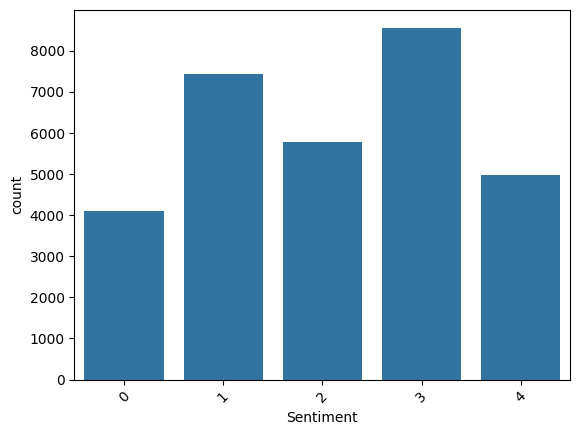

In [48]:
order = ['0', '1', '2', '3', '4']

# Plot the countplot with the specified order
sns.countplot(x=train_df_imbalanced.Sentiment, order=order)

plt.xticks(rotation=45)  # Adjust the rotation angle as needed

plt.show()

In [49]:
# source : https://github.com/rajlm10/NLPAUG_Usage/blob/main/YELP_NLPAUG.ipynb

import nlpaug
import nlpaug.augmenter.word as naw
aug = naw.SynonymAug(aug_src='wordnet',aug_max=4) # max number of words to be replaced
aug.augment("Misleading reviews. Worst coffee ever had, and sorely disappointing vibe.",n=2) # number of desired synthetic sentences

['Misdirect review. Worst coffee ever feature, and sorely disappointing vibe.',
 'Misleading reviews. Worst coffee tree ever had, and painfully unsatisfying vibe.']

In [ ]:
"""
This handcrafted code will oversample with augmented rows the categories that have less observations than the major one
"""

In [50]:
import nlpaug
import nlpaug.augmenter.word as naw
aug = naw.SynonymAug(aug_src='wordnet',aug_p=0.6)

import random

augmented_sentences=[]
augmented_sentences_labels=[]

max_count = train_df_imbalanced["Sentiment"].value_counts().max()

total_count = len(train_df_imbalanced["Sentiment"])

for i in train_df_imbalanced["Sentiment"].unique():

    if len(train_df_imbalanced[train_df_imbalanced["Sentiment"]==i])<max_count:

        delta = max_count - len(train_df_imbalanced[train_df_imbalanced["Sentiment"]==i])

        index_choice = train_df_imbalanced[train_df_imbalanced["Sentiment"]==i].index.to_list()

        for ind in random.choices(index_choice, k=delta):

            temps=aug.augment(train_df_imbalanced.loc[ind,"OriginalTweet"],n=1)
            check_original = train_df_imbalanced.loc[ind,"OriginalTweet"]
            for sent in temps:
                augmented_sentences.append(sent)
                check_augmented = sent
                augmented_sentences_labels.append(i)

print(check_original)
print(sent)

amp please something panic buying hoarding food amp basic necessities boston nuts essential employee amp long week work even get bread p coronavirus coronavirususa coronavirusmassachusetts
amp please something panic buying hoarding food ampere basic necessity boston nut essential employee amp long hebdomad body of work even get bread p coronavirus coronavirususa coronavirusmassachusetts


In [51]:
augmented_data = pd.DataFrame({"OriginalTweet": augmented_sentences, "Sentiment": augmented_sentences_labels})
augmented_data

,OriginalTweet,Sentiment
0,delight make foodstuff tone arm available loca...,2
1,novartis origin prices soar centennial state d...,2
2,dow surges points covid retrieval efforts oil ...,2
3,may escort accelerated declension dust ring ar...,2
4,song toilet paper hoarder jerk m ch toilette p...,2
...,...,...
11951,individual involve wiping supermarket trolley ...,1
11952,run zero societal distancing crush retail hote...,1
11953,love shameful,1
11954,beware cozenage naifa consumer site provides i...,1


In [52]:
train_df_augmented = pd.concat([train_df_imbalanced, augmented_data], axis=0)
train_df_augmented

,OriginalTweet,Sentiment
1537,please aware help people run affected clean av...,2
31573,films washing hands singing âhappy birthdayâ...,4
20077,people washing hands countertops nearly everyt...,2
27025,covid packaged foods snack brands enjoy surgin...,3
8074,list companies emailed covid strategy updates ...,3
...,...,...
11951,individual involve wiping supermarket trolley ...,1
11952,run zero societal distancing crush retail hote...,1
11953,love shameful,1
11954,beware cozenage naifa consumer site provides i...,1


In [53]:
train_df_augmented["Sentiment"].value_counts()

Sentiment
4    8566
3    8566
0    8566
1    8566
2    8559
Name: count, dtype: int64

In [54]:
train_df_augmented.describe(include="O")

,OriginalTweet
count,42823
unique,42601
top,
freq,26


In [55]:
duplicate_rows_subset = train_df_augmented[train_df_augmented.duplicated(subset=["OriginalTweet"])]

# Display duplicate rows based on subset of columns
print("Duplicate Rows based on Subset:")
for text in duplicate_rows_subset["OriginalTweet"]:
    print(text)

Duplicate Rows based on Subset:
supermarket la habra trying help local seniors covid pandemic opening doors half hour early day exclusively shoppers older
politics delayed necessary responses climate breakdown ecological collapse air water pollution obesity consumer debt appear delayed effective containment covid
congress urges govt share profits low crude oil prices people amid lockdown due covid economic downturn

toilet paper
e commerce mobile money e wallet see surge demand online shopping increases due covid trend going permanent eve pandemic attend days consultancy amp training p
brad paisley free grocery store delivering elderly amid coronavirus

situation w covid continues evolve take every available opportunity protect health staff customers includes closing retail locations online store remains open free shipping canada
coronavirus covid contest alert giveaway alert competition puzzles sanitizer italy wuhan grocery join
sanitizer italy wuhan grocery coronavirus covid contest 

In [56]:
train_df_augmented.drop_duplicates(inplace=True)

In [57]:
train_df_augmented["Sentiment"].value_counts()

Sentiment
0    8549
4    8547
1    8525
3    8519
2    8467
Name: count, dtype: int64

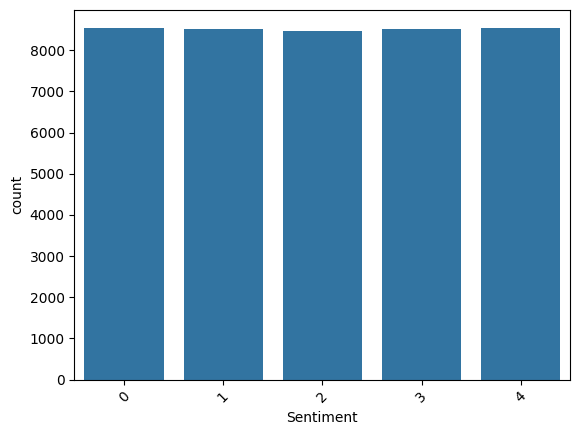

In [58]:
# Plot the countplot with the specified order
sns.countplot(x=train_df_augmented.Sentiment) #, order=order)

plt.xticks(rotation=45)  # Adjust the rotation angle as needed

plt.show()

In [ ]:
"""
Mission accomplished
"""

## Checking the new scores

In [59]:
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate the CountVectorizer
vect = CountVectorizer() #preprocessor=preprocess_corpus)

# use it to extract features from training data
vect.fit(train_df_augmented["OriginalTweet"])
X_train_control = vect.transform(train_df_augmented["OriginalTweet"])
# transform testing data (using training data's features)
X_valid_control = vect.transform(X_valid_clean)

# the dimension of our feature vector is 49753.
print(X_train_control.shape, X_valid_control.shape)

(42607, 36334) (10290, 36334)


In [60]:
#Take any classifier (LogisticRegression here, and train/test it like before.
from gensim.models import Word2Vec, KeyedVectors
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

logreg = LogisticRegression()

logreg.fit(X_train_control, train_df_augmented["Sentiment"])

y_pred = logreg.predict(X_valid_control)

print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.57      0.60      1370
           1       0.51      0.49      0.50      2480
           2       0.59      0.70      0.64      1928
           3       0.54      0.53      0.54      2856
           4       0.64      0.61      0.63      1656

    accuracy                           0.57     10290
   macro avg       0.58      0.58      0.58     10290
weighted avg       0.57      0.57      0.57     10290



In [61]:
# instantiate a Multinomial Naive Bayes model
nb = MultinomialNB()
# train the model(timing it with an IPython "magic command")
%time nb.fit(X_train_control, train_df_augmented["Sentiment"])

# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_valid_control)

print(classification_report(y_valid, y_pred_class))

CPU times: total: 93.8 ms
Wall time: 21 ms
              precision    recall  f1-score   support

           0       0.47      0.45      0.46      1370
           1       0.42      0.44      0.43      2480
           2       0.59      0.39      0.47      1928
           3       0.42      0.53      0.47      2856
           4       0.50      0.45      0.47      1656

    accuracy                           0.46     10290
   macro avg       0.48      0.45      0.46     10290
weighted avg       0.47      0.46      0.46     10290



In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer


# Convert text into TF-IDF vectors
vectorizer = TfidfVectorizer()
X_train_control = vectorizer.fit_transform(train_df_augmented["OriginalTweet"])


# transform testing data (using training data's features)
X_valid_control = vectorizer.transform(X_valid_clean)

# the dimension of our feature vector is 49753.
print(X_train_control.shape, X_valid_control.shape)

(42607, 36334) (10290, 36334)


In [63]:
#Take any classifier (LogisticRegression here, and train/test it like before.
from gensim.models import Word2Vec, KeyedVectors
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

logreg = LogisticRegression()

logreg.fit(X_train_control, train_df_augmented["Sentiment"])

y_pred = logreg.predict(X_valid_control)

print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.56      0.56      1370
           1       0.49      0.45      0.47      2480
           2       0.56      0.66      0.61      1928
           3       0.52      0.49      0.51      2856
           4       0.60      0.60      0.60      1656

    accuracy                           0.54     10290
   macro avg       0.55      0.55      0.55     10290
weighted avg       0.54      0.54      0.54     10290



In [64]:
# instantiate a Multinomial Naive Bayes model
nb = MultinomialNB()
# train the model(timing it with an IPython "magic command")
%time nb.fit(X_train_control, train_df_augmented["Sentiment"])

# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_valid_control)

print(classification_report(y_valid, y_pred_class))

CPU times: total: 93.8 ms
Wall time: 17 ms
              precision    recall  f1-score   support

           0       0.47      0.46      0.47      1370
           1       0.42      0.43      0.43      2480
           2       0.62      0.35      0.45      1928
           3       0.42      0.54      0.47      2856
           4       0.48      0.48      0.48      1656

    accuracy                           0.46     10290
   macro avg       0.48      0.45      0.46     10290
weighted avg       0.48      0.46      0.46     10290



In [ ]:
"""
Sum up:

LogisticRegression
before oversampling and text augmentation
CountVectorizer
accuracy: 0.58

after oversampling and text augmentation
CountVectorizer
accuracy: 0.57

TfidfVectorizer
accuracy: 0.54


MultinomialNB
before oversampling and text augmentation
CountVectorizer
accuracy: 0.47

after oversampling and text augmentation
CountVectorizer
accuracy: 0.46

TfidfVectorizer
accuracy: 0.46

"""

In [65]:
"""
The scores after the Vectorization (tf-idf or count) are not better.

But we know that with a balanced dataset is easier to handle than an imbalanced one.

However we can see that the scores are very few slightly better with count vectorizer than with tf-idf vectorizer.
"""

'\nThe scores after the Vectorization (tf-idf or count) are not better.\n\nBut we know that with a balanced dataset is easier to handle than an imbalanced one.\n\nHowever we can see that the scores are very few slightly better with count vectorizer than with tf-idf vectorizer.\n'

In [66]:
X_train_clean = train_df_augmented["OriginalTweet"].to_list()

In [67]:
y_train = train_df_augmented["Sentiment"]

In [68]:
len(X_train_clean)

42607

In [69]:
len(y_train)

42607

In [70]:
train_df_augmented

,OriginalTweet,Sentiment
1537,please aware help people run affected clean av...,2
31573,films washing hands singing âhappy birthdayâ...,4
20077,people washing hands countertops nearly everyt...,2
27025,covid packaged foods snack brands enjoy surgin...,3
8074,list companies emailed covid strategy updates ...,3
...,...,...
11951,individual involve wiping supermarket trolley ...,1
11952,run zero societal distancing crush retail hote...,1
11953,love shameful,1
11954,beware cozenage naifa consumer site provides i...,1


# 4. Vectorize Texts (one hot encoder, tfidf, embeddings (word2vec with gensim, ELMO, BERT, GPT, etc.))

In [ ]:
"""
I will create several vectorized datas and compare the scores on a simple model

"""

## 4.1 CountVectorizer

In [71]:
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate the CountVectorizer
vect = CountVectorizer() #preprocessor=preprocess_corpus)

# use it to extract features from training data
vect.fit(X_train_clean)
X_train_dtm = vect.transform(X_train_clean)
# transform testing data (using training data's features)
X_valid_dtm = vect.transform(X_valid_clean)

# the dimension of our feature vector is .
print(X_train_dtm.shape, X_valid_dtm.shape)

(42607, 36334) (10290, 36334)


In [72]:
X_train.head()

1537     #Please be #aware, #help the #people, donÂt #...
31573    These films will have you washing your hands w...
20077    People are washing their hands, countertops, a...
27025    COVID-19: Packaged foods and snack brands enjo...
8074     List of companies that have emailed me with th...
Name: OriginalTweet, dtype: object

In [73]:
X_train_clean[0]

'please aware help people run affected clean avoid going make distance sell san ers amp masks reasonable prices eat hygienic food healthy amp immune good covid coronavirus covid coronavirusoutbreak dbz diary'

In [74]:
print(X_train_dtm[0].toarray())#.sum()

[[0 0 0 ... 0 0 0]]


In [75]:
print(X_train_dtm[0].toarray().sum())

31


## 4.3 TF-IDF

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer


# Convert text into TF-IDF vectors
vectorizer = TfidfVectorizer()

vectorizer.fit(X_train_clean)

X_train_tfidf = vectorizer.transform(X_train_clean)

# transform testing data (using training data's features)
X_valid_tfidf = vectorizer.transform(X_valid_clean)

# the dimension of our feature vector is .
print(X_train_tfidf.shape, X_valid_tfidf.shape)

(42607, 36334) (10290, 36334)


In [77]:
print(X_train_tfidf[0].toarray())#.sum()

[[0. 0. 0. ... 0. 0. 0.]]


In [78]:
print(X_train_tfidf[0].toarray().sum())

5.084976026683481


## 4.2 Word2Vec

In [79]:
#Load W2V model. This will take some time.
%time w2v_model = KeyedVectors.load('./Data/word2vec-google-news-300.model')  # model found on https://huggingface.co/fse/word2vec-google-news-300/tree/main

"""
model found on https://huggingface.co/fse/word2vec-google-news-300/tree/main
you need to download
word2vec-google-news-300.model
= 177Mo

and also 
word2vec-google-news-300.model.vectors.npy
= 3.5 Go


"""

print('done loading Word2Vec')

CPU times: total: 24.9 s
Wall time: 26 s
done loading Word2Vec


In [80]:
#Inspect the model
word2vec_vocab = w2v_model.index_to_key
word2vec_vocab_lower = [item.lower() for item in word2vec_vocab]
print(len(set(word2vec_vocab)), len(set(word2vec_vocab_lower)))

3000000 2702150


In [81]:
def tokenize_corpus(texts):
    #pre-processing imports
    from nltk.tokenize import word_tokenize

    temp=[]

    for sentence in texts:
        words = word_tokenize(sentence)
        temp.append(words)

    return temp

test = ["zazkf o e, pzkff pz", "fznefqn qefe geqgr trh jtrhe"]

test = tokenize_corpus(test)
test

[['zazkf', 'o', 'e', ',', 'pzkff', 'pz'],
 ['fznefqn', 'qefe', 'geqgr', 'trh', 'jtrhe']]

In [82]:
X_train_clean_tokenize = tokenize_corpus(X_train_clean)

X_valid_clean_tokenize = tokenize_corpus(X_valid_clean)

In [83]:
X_train

1537     #Please be #aware, #help the #people, donÂt #...
31573    These films will have you washing your hands w...
20077    People are washing their hands, countertops, a...
27025    COVID-19: Packaged foods and snack brands enjo...
8074     List of companies that have emailed me with th...
                               ...                        
27998    Your neighbors need your help Local food banks...
16146    It s like it s The Walking Dead I went out for...
2449     I haven't had an online #rant about this whole...
31319    Does anyone w/#neuropathy know way to open tra...
12251    s George Eustice There are discussions between...
Name: OriginalTweet, Length: 30867, dtype: object

In [84]:
X_train.shape

(30867,)

In [85]:
X_train_clean

['please aware help people run affected clean avoid going make distance sell san ers amp masks reasonable prices eat hygienic food healthy amp immune good covid coronavirus covid coronavirusoutbreak dbz diary',
 'films washing hands singing â\x93happy birthdayâ\x94 twice using hand sanitizer stocking toilet paper even using â\x93social distancingâ\x94 mom read coronavirus covid contagion podcast horror',
 'people washing hands countertops nearly everything else effort stem spread covid virus recent trip supermarket found plenty bread milk cleaning aisle shelves via',
 'covid packaged foods snack brands enjoy surging sales consumers stock pantries',
 'list companies emailed covid strategy updates guy detailed car like years ago indoor trampoline park times eliot jordan furniture hannafords supermarket literally every company somehow email',
 'enough food stock product everyone says ministry commerce full details corn virus corona vid covid covid covid saudi business',
 'misinformation s

In [86]:
X_train_clean_tokenize

[['please',
  'aware',
  'help',
  'people',
  'run',
  'affected',
  'clean',
  'avoid',
  'going',
  'make',
  'distance',
  'sell',
  'san',
  'ers',
  'amp',
  'masks',
  'reasonable',
  'prices',
  'eat',
  'hygienic',
  'food',
  'healthy',
  'amp',
  'immune',
  'good',
  'covid',
  'coronavirus',
  'covid',
  'coronavirusoutbreak',
  'dbz',
  'diary'],
 ['films',
  'washing',
  'hands',
  'singing',
  'â\x93happy',
  'birthdayâ\x94',
  'twice',
  'using',
  'hand',
  'sanitizer',
  'stocking',
  'toilet',
  'paper',
  'even',
  'using',
  'â\x93social',
  'distancingâ\x94',
  'mom',
  'read',
  'coronavirus',
  'covid',
  'contagion',
  'podcast',
  'horror'],
 ['people',
  'washing',
  'hands',
  'countertops',
  'nearly',
  'everything',
  'else',
  'effort',
  'stem',
  'spread',
  'covid',
  'virus',
  'recent',
  'trip',
  'supermarket',
  'found',
  'plenty',
  'bread',
  'milk',
  'cleaning',
  'aisle',
  'shelves',
  'via'],
 ['covid',
  'packaged',
  'foods',
  'snack'

In [87]:
# Creating a feature vector by averaging all embeddings for all sentences
def embedding_feats(list_of_lists):
    DIMENSION = 300
    zero_vector = np.zeros(DIMENSION)
    features = []
    flag=0

    from nltk.corpus import stopwords
    stopwords_english = (stopwords.words('english'))

    for tokens in list_of_lists:
        temp=[]
        for token in tokens:

            if token in w2v_model: #word2vec_vocab_lower:
                temp.append(w2v_model[token])
            else:
                #print("error with token <"+token+"> index n°"+str(flag))
                #print("test")
                if token in stopwords_english:
                    print(token+" is in stopwords list....."+str(flag))

        if temp:
            features.append(np.mean(temp, axis=0))
        else:
            features.append(zero_vector)

        flag+=1

    return features


w2v_X_train = embedding_feats(X_train_clean_tokenize)
print(len(w2v_X_train))

w2v_X_valid = embedding_feats(X_valid_clean_tokenize)
print(len(w2v_X_valid))

a is in stopwords list.....30706
of is in stopwords list.....30707
of is in stopwords list.....30726
of is in stopwords list.....30731
of is in stopwords list.....30748
of is in stopwords list.....30748
a is in stopwords list.....30751
of is in stopwords list.....30778
to is in stopwords list.....30784
of is in stopwords list.....30799
of is in stopwords list.....30801
to is in stopwords list.....30805
a is in stopwords list.....30805
a is in stopwords list.....30821
of is in stopwords list.....30834
a is in stopwords list.....30838
of is in stopwords list.....30876
to is in stopwords list.....30922
of is in stopwords list.....30935
and is in stopwords list.....30941
of is in stopwords list.....30949
a is in stopwords list.....30968
of is in stopwords list.....30975
of is in stopwords list.....31009
of is in stopwords list.....31021
of is in stopwords list.....31040
a is in stopwords list.....31051
of is in stopwords list.....31057
of is in stopwords list.....31061
of is in stopwords l

of is in stopwords list.....34325
of is in stopwords list.....34329
of is in stopwords list.....34336
and is in stopwords list.....34336
of is in stopwords list.....34338
to is in stopwords list.....34372
a is in stopwords list.....34372
of is in stopwords list.....34376
of is in stopwords list.....34378
of is in stopwords list.....34384
of is in stopwords list.....34406
of is in stopwords list.....34417
of is in stopwords list.....34418
of is in stopwords list.....34431
of is in stopwords list.....34434
of is in stopwords list.....34437
a is in stopwords list.....34458
of is in stopwords list.....34472
a is in stopwords list.....34496
of is in stopwords list.....34501
of is in stopwords list.....34513
to is in stopwords list.....34514
of is in stopwords list.....34517
to is in stopwords list.....34544
to is in stopwords list.....34549
a is in stopwords list.....34549
of is in stopwords list.....34550
of is in stopwords list.....34568
of is in stopwords list.....34568
of is in stopword

of is in stopwords list.....37191
and is in stopwords list.....37210
of is in stopwords list.....37219
of is in stopwords list.....37220
of is in stopwords list.....37225
and is in stopwords list.....37225
of is in stopwords list.....37230
and is in stopwords list.....37247
a is in stopwords list.....37251
of is in stopwords list.....37267
a is in stopwords list.....37267
a is in stopwords list.....37271
of is in stopwords list.....37274
of is in stopwords list.....37289
and is in stopwords list.....37294
of is in stopwords list.....37299
of is in stopwords list.....37306
of is in stopwords list.....37324
of is in stopwords list.....37324
of is in stopwords list.....37326
of is in stopwords list.....37331
of is in stopwords list.....37332
a is in stopwords list.....37342
of is in stopwords list.....37348
of is in stopwords list.....37357
of is in stopwords list.....37357
of is in stopwords list.....37370
of is in stopwords list.....37376
of is in stopwords list.....37376
and is in stop

of is in stopwords list.....40119
of is in stopwords list.....40124
a is in stopwords list.....40149
of is in stopwords list.....40150
to is in stopwords list.....40156
of is in stopwords list.....40166
to is in stopwords list.....40180
a is in stopwords list.....40187
of is in stopwords list.....40195
of is in stopwords list.....40203
of is in stopwords list.....40205
of is in stopwords list.....40216
a is in stopwords list.....40218
of is in stopwords list.....40218
of is in stopwords list.....40227
of is in stopwords list.....40232
of is in stopwords list.....40234
of is in stopwords list.....40235
of is in stopwords list.....40242
of is in stopwords list.....40246
a is in stopwords list.....40248
of is in stopwords list.....40251
a is in stopwords list.....40258
and is in stopwords list.....40264
of is in stopwords list.....40266
to is in stopwords list.....40275
of is in stopwords list.....40298
and is in stopwords list.....40309
of is in stopwords list.....40326
of is in stopword

10290


## 4.3 BERT

# 4.4 Neural Networks

In [88]:
#X_train_clean =  [preprocess_corpus(x) for x in X_train_light_clean["OriginalTweet"]]
display(X_train_clean[:2])

#X_valid_clean = [preprocess_corpus(x) for x in X_valid_light__clean]
display(X_valid_clean[:2])

['please aware help people run affected clean avoid going make distance sell san ers amp masks reasonable prices eat hygienic food healthy amp immune good covid coronavirus covid coronavirusoutbreak dbz diary',
 'films washing hands singing â\x93happy birthdayâ\x94 twice using hand sanitizer stocking toilet paper even using â\x93social distancingâ\x94 mom read coronavirus covid contagion podcast horror']

['covid impacted media consumption generation media consumption generation broadcast media mediaagency mediaplanning advertising mediastrategy consumer digital advertising digital marketing brands med',
 'week hosted webinar discussing changing automotive consumer behaviour trends observed week unprecedented upheaval well best practise digital marketing efforts coronavirus pandemic']

In [89]:
training_labels = y_train.tolist()
valid_labels = y_valid.tolist()
labels_index = {"Extremely Negative": 0,
                               "Negative":1,
                               "Neutral": 2,
                               "Positive": 3,
                               "Extremely Positive": 4
                               }

In [90]:
# Tokenization of sentences using keras Tokenizer
#Vectorize these text samples into a 2D integer tensor using Keras Tokenizer
#
MAX_NUM_WORDS = 20000
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(X_train_clean)
train_sequences = tokenizer.texts_to_sequences(X_train_clean) #Converting text to a vector of word indexes
valid_sequences = tokenizer.texts_to_sequences(X_valid_clean)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 37247 unique tokens.


In [91]:
train_sequences[0]

[43,
 1193,
 32,
 8,
 209,
 562,
 476,
 276,
 41,
 56,
 312,
 377,
 1327,
 4954,
 9,
 83,
 1928,
 5,
 428,
 4343,
 3,
 390,
 9,
 1403,
 71,
 1,
 2,
 1,
 456,
 3785]

In [92]:
MAX_LEN = 1000
train_data = pad_sequences(sequences=train_sequences, maxlen=MAX_LEN, padding='pre', truncating='post', value=0.0)
valid_data = pad_sequences(sequences=valid_sequences, maxlen=MAX_LEN, padding='pre', truncating='post', value=0.0)

In [93]:
"""

Here we will use pre padding to have numeric at the end

so that LSTM should perform better because it works with the end of the sequence

"""

'\n\nHere we will use pre padding to have numeric at the end\n\nso that LSTM should perform better because it works with the end of the sequence\n\n'

In [94]:
train_data[0], valid_data[0]

(array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

In [95]:
"""
We can see the matrix is super full of zero = sparsity = not good for learning
We may need to adjust the max length
"""

'\nWe can see the matrix is super full of zero = sparsity = not good for learning\nWe may need to adjust the max length\n'

In [96]:
# Converting the target into a categorical tensor variable for DL model training


In [97]:
train_labels_cat = to_categorical(np.asarray(training_labels))
valid_labels_cat = to_categorical(np.asarray(valid_labels))

In [98]:
training_labels[12500] , train_labels_cat[12500]

(0, array([1., 0., 0., 0., 0.]))

In [99]:
# renaming
x_train_nn = train_data
y_train_nn = train_labels_cat
x_val_nn = valid_data
y_val_nn = valid_labels_cat

In [100]:
# Convert the token ids into embedding vectors

In [101]:
EMBEDDING_DIM = 100
print('Preparing embedding matrix.')

# first, build index mapping words in the embeddings set to their embedding vector
#  every line in glove.6B.100d.txt contains the word followed by the embedding vector
embeddings_index = {}
with open('./Data/glove.6B.100d.txt',encoding='utf8') as f: #os.path.join(GLOVE_DIR, 'glove.6B.100d.txt')
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print('Found %s word vectors in Glove embeddings.' % len(embeddings_index))

# prepare embedding matrix - rows are the words from word_index, columns are the embeddings of that word from glove.
num_words = min(MAX_NUM_WORDS, len(word_index)) + 1
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in word_index.items():
    if i > MAX_NUM_WORDS:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

Preparing embedding matrix.
Found 400000 word vectors in Glove embeddings.


In [102]:
# load these pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed during training
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding, LSTM
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            #input_length=MAX_LEN, #it doesn't work in my environement apparently - but on colab yes
                            trainable=False)
print("Preparing of embedding matrix is done")

Preparing of embedding matrix is done


# 5. ML Classification model(s) or DL model or an ensemble of several ML/DL or both ML and DL models

# 7. Hyperparameter optimization (Cross validation - hyperopt - Gridsearch)

In [103]:
# Function to plot confusion matrix.
# Ref:http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
import itertools
from sklearn.metrics import roc_auc_score

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label',fontsize=15)
    plt.xlabel('Predicted label',fontsize=15)

# 6. Choose and justify the choice of the evaluation metric

In [104]:
"""
Evaluation Metrics
Accuracy is a great measure but only when you have balanced data set.

So i'll stick to accuracy.


If i haven't augmented the train data i'ld have looked at other parameters to evaluate the performance of the model.
With imbalenced, we could got high accuracy but not good model.
We should have used F1 score — which is the weighted average of Precision and Recall.
F1 Score = 2*(Recall * Precision) / (Recall + Precision)

=> Because none of the class if prejudiciable for us (like for cancer detection = recall or fraud detection = precision).

"""

"\nEvaluation Metrics\nAccuracy is a great measure but only when you have balanced data set.\n\nSo i'll stick to accuracy.\n\n\nIf i haven't augmented the train data i'ld have looked at other parameters to evaluate the performance of the model.\nWith imbalenced, we could got high accuracy but not good model.\nWe should have used F1 score — which is the weighted average of Precision and Recall.\nF1 Score = 2*(Recall * Precision) / (Recall + Precision)\n\n=> Because none of the class if prejudiciable for us (like for cancer detection = recall or fraud detection = precision).\n\n"

### 5.1 MultinomialNB

In [105]:
# chapTextClassification_OnePipeline_ManyClassifiers-corrected-version

In [106]:
def try_MultinomialNB(x,xx,y,yy):
    # instantiate a Multinomial Naive Bayes model
    nb = MultinomialNB()
    # train the model(timing it with an IPython "magic command")
    nb.fit(x, y)

    # make class predictions for X_test_dtm
    y_pred_class = nb.predict(xx)
    test_pred = pd.get_dummies(y_pred_class)

    try:
        if type(yy)==list:
            y_valid_array = yy
        else:
            y_valid_array=yy.to_numpy()
    except:
        y_valid_array = yy.numpy()
    valid_pred = pd.get_dummies(y_valid_array)

    # Print accuracy:
    print("Accuracy: ", accuracy_score(y_valid_array, y_pred_class))

    # compute the confusion matrix
    cnf_matrix = confusion_matrix(y_valid_array, y_pred_class)
    # plot cnf_matrix
    plt.figure(figsize=(6,4))
    plot_confusion_matrix(cnf_matrix, classes=['Extremely Negative', 'Negative', 'Neutral', 'Positive', 'Extremely Positive'],
                          normalize=True,
                          title='Confusion matrix with all features')

    #""" We don't use ROC AUC for our classification problem
    # calculate AUC
    y_pred_prob = nb.predict_proba(xx)[:, 1]
    print("ROC_AOC_Score: ", roc_auc_score(valid_pred, test_pred, multi_class="ovo"))

    print(classification_report(y_valid_array, y_pred_class))

    y_valid_array, y_pred_class = None, None

    return None

Accuracy:  0.4582118561710398
ROC_AOC_Score:  0.6558523689844314
              precision    recall  f1-score   support

           0       0.47      0.45      0.46      1370
           1       0.42      0.44      0.43      2480
           2       0.59      0.39      0.47      1928
           3       0.42      0.53      0.47      2856
           4       0.50      0.45      0.47      1656

    accuracy                           0.46     10290
   macro avg       0.48      0.45      0.46     10290
weighted avg       0.47      0.46      0.46     10290



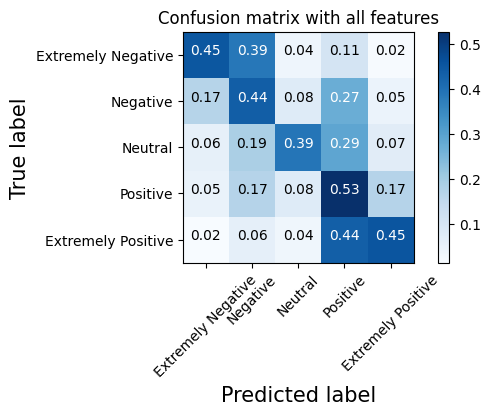

In [107]:
try_MultinomialNB(X_train_dtm, X_valid_dtm, y_train, y_valid)

Accuracy:  0.45792031098153546
ROC_AOC_Score:  0.6558956192365074
              precision    recall  f1-score   support

           0       0.47      0.46      0.47      1370
           1       0.42      0.43      0.43      2480
           2       0.62      0.35      0.45      1928
           3       0.42      0.54      0.47      2856
           4       0.48      0.48      0.48      1656

    accuracy                           0.46     10290
   macro avg       0.48      0.45      0.46     10290
weighted avg       0.48      0.46      0.46     10290



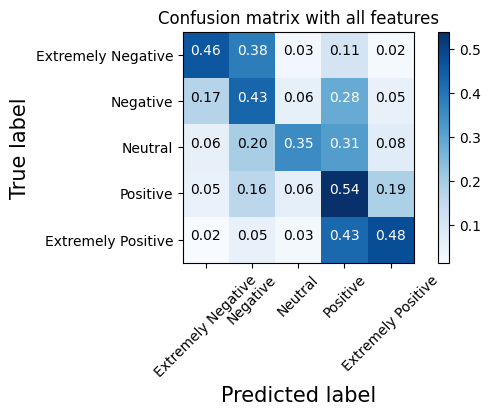

In [108]:
try_MultinomialNB(X_train_tfidf, X_valid_tfidf, y_train, y_valid)

Accuracy:  0.37201166180758016
ROC_AOC_Score:  0.625767850060109
              precision    recall  f1-score   support

           0       0.36      0.51      0.42      1370
           1       0.36      0.24      0.29      2480
           2       0.40      0.47      0.43      1928
           3       0.38      0.22      0.28      2856
           4       0.36      0.59      0.45      1656

    accuracy                           0.37     10290
   macro avg       0.37      0.41      0.37     10290
weighted avg       0.37      0.37      0.36     10290



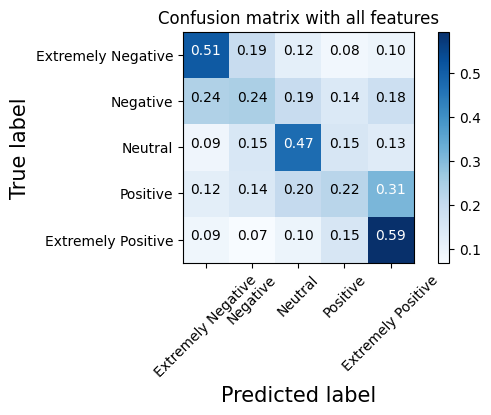

In [109]:
try_MultinomialNB(np.abs(w2v_X_train), np.abs(w2v_X_valid), y_train, y_valid)

In [110]:
#try_MultinomialNB(train_inputs, validation_inputs, train_labels, validation_labels) #BERT embedding = aborted

Accuracy:  0.24897959183673468
ROC_AOC_Score:  0.531472148014591
              precision    recall  f1-score   support

           0       0.18      0.10      0.13      1370
           1       0.25      0.03      0.06      2480
           2       0.25      0.69      0.37      1928
           3       0.28      0.24      0.26      2856
           4       0.21      0.19      0.20      1656

    accuracy                           0.25     10290
   macro avg       0.24      0.25      0.20     10290
weighted avg       0.25      0.25      0.21     10290



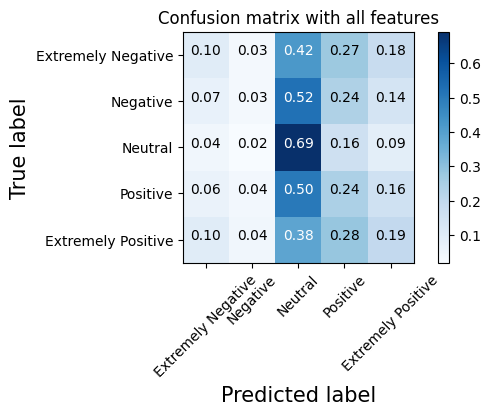

In [111]:
try_MultinomialNB(x_train_nn, x_val_nn, training_labels, valid_labels)

In [ ]:
"""
Best accuracy for MultinomialNB is 0.46 with the countvectorizer and lowest is 0.25 with tokenizer

this is normal because the embedding hasn't been done yet in the tokenizer steps

"""

## Logistic Regression model

In [112]:
# chapTextClassification_Word2Vec-Romain_THOMAS

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the parameter grid to search over
param_grid = {
    'penalty': [None, 'l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100]
}

# Create an instance of Logistic Regression
logreg = LogisticRegression()

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train_dtm, y_train)

# Get the best estimator from the grid search
best_estimator = grid_search.best_estimator_

# Use the best estimator to make predictions on the validation set
y_pred = best_estimator.predict(X_valid_dtm)

# Print classification report
print("Best Parameters:", grid_search.best_params_)
print("Classification Report:")
print(classification_report(y_valid, y_pred))

Best Parameters: {'C': 1, 'penalty': 'l2'}
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.57      0.60      1370
           1       0.51      0.49      0.50      2480
           2       0.59      0.70      0.64      1928
           3       0.54      0.53      0.54      2856
           4       0.64      0.61      0.63      1656

    accuracy                           0.57     10290
   macro avg       0.58      0.58      0.58     10290
weighted avg       0.57      0.57      0.57     10290



In [ ]:
"""
The gridsearch on LogisticRegression gives me Best Parameters: {'C': 1, 'penalty': 'l2'}

"""

In [114]:
def try_logreg(x,xx,y,yy):
    logreg = LogisticRegression(C= 1, penalty= 'l2')

    logreg.fit(x, y)

    y_pred_class = logreg.predict(xx)
    test_pred = pd.get_dummies(y_pred_class)

    try:
        if type(yy)==list:
            y_valid_array = yy
        else:
            y_valid_array=yy.to_numpy()
    except:
        y_valid_array = yy.numpy()
    valid_pred = pd.get_dummies(y_valid_array)

    # Print accuracy:
    print("Accuracy: ", accuracy_score(y_valid_array, y_pred_class))

    # compute the confusion matrix
    cnf_matrix = confusion_matrix(y_valid_array, y_pred_class)
    # plot cnf_matrix
    plt.figure(figsize=(6,4))
    plot_confusion_matrix(cnf_matrix, classes=['Extremely Negative', 'Negative', 'Neutral', 'Positive', 'Extremely Positive'],
                          normalize=True,
                          title='Confusion matrix with all features')

    #""" We don't use ROC AUC for our classification problem
    # calculate AUC
    #y_pred_prob = nb.predict_proba(xx)[:, 1]
    print("ROC_AOC_Score: ", roc_auc_score(valid_pred, test_pred, multi_class="ovo"))

    print(classification_report(y_valid_array, y_pred_class))

    y_valid_array, y_pred_class = None, None

    return None

Accuracy:  0.5715257531584063
ROC_AOC_Score:  0.7354037102699325
              precision    recall  f1-score   support

           0       0.62      0.57      0.60      1370
           1       0.51      0.49      0.50      2480
           2       0.59      0.70      0.64      1928
           3       0.54      0.53      0.54      2856
           4       0.64      0.61      0.63      1656

    accuracy                           0.57     10290
   macro avg       0.58      0.58      0.58     10290
weighted avg       0.57      0.57      0.57     10290



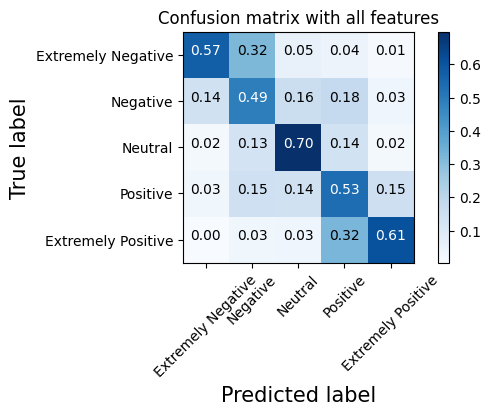

In [115]:
try_logreg(X_train_dtm, X_valid_dtm, y_train, y_valid)

Accuracy:  0.5407191448007774
ROC_AOC_Score:  0.7178472835719012
              precision    recall  f1-score   support

           0       0.56      0.56      0.56      1370
           1       0.49      0.45      0.47      2480
           2       0.57      0.66      0.61      1928
           3       0.52      0.49      0.51      2856
           4       0.59      0.60      0.60      1656

    accuracy                           0.54     10290
   macro avg       0.55      0.55      0.55     10290
weighted avg       0.54      0.54      0.54     10290



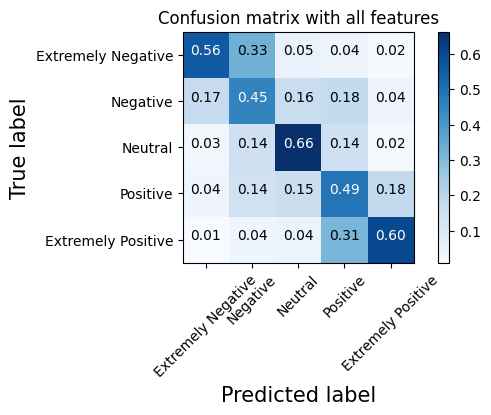

In [116]:
try_logreg(X_train_tfidf, X_valid_tfidf, y_train, y_valid)

Accuracy:  0.46190476190476193
ROC_AOC_Score:  0.6743564842314655
              precision    recall  f1-score   support

           0       0.46      0.57      0.51      1370
           1       0.43      0.36      0.39      2480
           2       0.48      0.55      0.51      1928
           3       0.44      0.38      0.41      2856
           4       0.50      0.57      0.53      1656

    accuracy                           0.46     10290
   macro avg       0.46      0.49      0.47     10290
weighted avg       0.46      0.46      0.46     10290



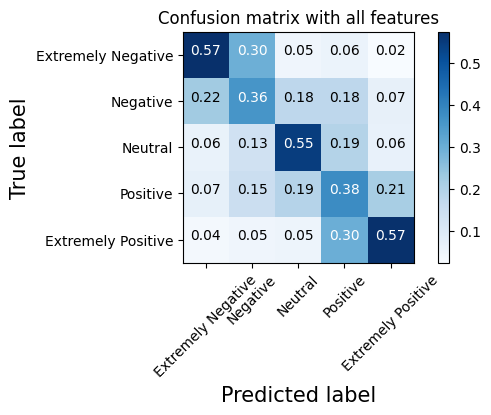

In [117]:
try_logreg(w2v_X_train, w2v_X_valid, y_train, y_valid)

Accuracy:  0.219533527696793
ROC_AOC_Score:  0.5390766366254369
              precision    recall  f1-score   support

           0       0.16      0.42      0.23      1370
           1       0.19      0.01      0.02      2480
           2       0.27      0.64      0.38      1928
           3       0.25      0.00      0.01      2856
           4       0.20      0.25      0.22      1656

    accuracy                           0.22     10290
   macro avg       0.22      0.26      0.17     10290
weighted avg       0.22      0.22      0.15     10290



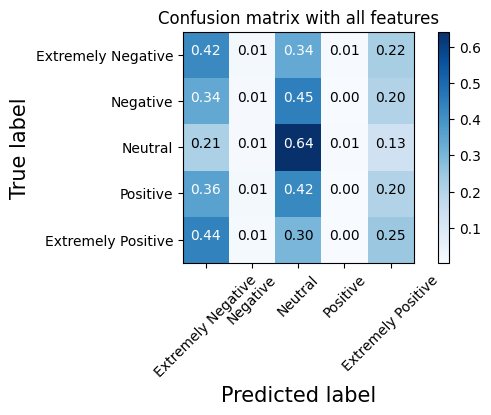

In [118]:
try_logreg(x_train_nn, x_val_nn, training_labels, valid_labels)

In [ ]:
"""
Best accuracy for MultinomialNB is 0.57 with the countvectorizer and lowest is 0.22 with tokenizer

this is normal because the embedding hasn't been done yet in the tokenizer steps
"""

### 1D CNN Model with pre-trained embedding

In [119]:
# specify GPU device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
if torch.cuda.is_available():
    n_gpu = torch.cuda.device_count()
    torch.cuda.get_device_name(0)
print(device)

cuda


In [120]:
print('Define a 1D CNN model.')

cnnmodel = Sequential()
cnnmodel.add(embedding_layer)
cnnmodel.add(Conv1D(128, 5, activation='relu'))
cnnmodel.add(MaxPooling1D(5))
cnnmodel.add(Conv1D(128, 5, activation='relu'))
cnnmodel.add(MaxPooling1D(5))
cnnmodel.add(Conv1D(128, 5, activation='relu'))
cnnmodel.add(GlobalMaxPooling1D())
cnnmodel.add(Dense(128, activation='relu'))
cnnmodel.add(Dense(len(labels_index), activation='softmax'))

cnnmodel.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])
#Train the model. Tune to validation set.

cnnmodel = cnnmodel

cnnmodel.fit(x_train_nn, y_train_nn,
          batch_size=128,
          epochs=1, validation_data=(x_val_nn, y_val_nn))
#Evaluate on test set:
score, acc = cnnmodel.evaluate(valid_data, valid_labels_cat)
print('Valid accuracy with CNN:', acc)

Define a 1D CNN model.
333/333 ━━━━━━━━━━━━━━━━━━━━ 129s 382ms/step - acc: 0.3785 - loss: 1.4221 - val_acc: 0.4960 - val_loss: 1.1877
322/322 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - acc: 0.5031 - loss: 1.1692
Valid accuracy with CNN: 0.4960155487060547


### LSTM Model using pre-trained Embedding Layer

In [121]:
print("Defining and training an LSTM model, using pre-trained embedding layer")

rnnmodel2 = Sequential()
rnnmodel2.add(embedding_layer)
rnnmodel2.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
rnnmodel2.add(Dense(len(labels_index), activation='softmax'))
rnnmodel2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print('Training the RNN')

rnnmodel2 = rnnmodel2

rnnmodel2.fit(x_train_nn, y_train_nn,
          batch_size=32,
          epochs=1,
          validation_data=(x_val_nn, y_val_nn))
score, acc = rnnmodel2.evaluate(valid_data, valid_labels_cat,
                            batch_size=32)
print('Valid accuracy with LSTM:', acc)


Defining and training an LSTM model, using pre-trained embedding layer
Training the RNN
1332/1332 ━━━━━━━━━━━━━━━━━━━━ 551s 413ms/step - accuracy: 0.4616 - loss: 0.4142 - val_accuracy: 0.6170 - val_loss: 0.3282
322/322 ━━━━━━━━━━━━━━━━━━━━ 46s 143ms/step - accuracy: 0.6278 - loss: 0.3226
Valid accuracy with LSTM: 0.617006778717041


In [ ]:
"""
The accuracy is starting to be good

The pre padding is good for LSTM (in comparaison to my last homewrok with post padding)
because LSTM works with the first to the last ones and so having the 0 at the begining helps

"""

### Transformer Model
Refer to the [keras tutorial](https://keras.io/examples/nlp/text_classification_with_transformer/) to implement and evaluate your model

In [122]:
#!pip install --upgrade keras
#!pip install --upgrade tensorflow

In [123]:
import keras

print(keras.__version__)

3.1.1


In [124]:
import keras
#from keras import ops
from keras import layers

In [125]:
# Implement a Transformer block as a layer

class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super().__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output)
        return self.layernorm2(out1 + ffn_output)

In [126]:
# Implement embedding layer
# Two seperate embedding layers, one for tokens, one for token index (positions).

class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super().__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = ops.shape(x)[-1]
        positions = ops.arange(start=0, stop=maxlen, step=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [127]:
"""
# Download and prepare dataset

vocab_size = 20000  # Only consider the top 20k words
maxlen = 200  # Only consider the first 200 words of each movie review
(x_train_nn, y_train_nn), (x_val_nn, y_val_nn) = keras.datasets.imdb.load_data(num_words=vocab_size)
print(len(x_train_nn), "Training sequences")
print(len(x_val_nn), "Validation sequences")
x_train = keras.utils.pad_sequences(x_train_nn, maxlen=maxlen)
x_val = keras.utils.pad_sequences(x_val_nn, maxlen=maxlen)
"""

# We already have our x_train_nn, y_train_nn, x_val_nn, y_val_nn
"""
We used earlier:
MAX_NUM_WORDS = 20000
MAX_LEN = 1000
EMBEDDING_DIM = 100
"""
vocab_size = MAX_NUM_WORDS
maxlen = MAX_LEN

In [128]:
# Create classifier model using transformer layer
# Transformer layer outputs one vector for each time step of our input sequence.
# Here, we take the mean across all time steps and use a feed forward network on top of it to classify text.

embed_dim = 32  # Embedding size for each token
num_heads = 2  # Number of attention heads
ff_dim = 32  # Hidden layer size in feed forward network inside transformer

"""
We used earlier:
EMBEDDING_DIM = 100
"""
embed_dim = EMBEDDING_DIM

inputs = layers.Input(shape=(maxlen,))

#embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)

embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            #input_length=MAX_LEN,
                            trainable=False)

x = embedding_layer(inputs)
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(20, activation="relu")(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(len(labels_index), activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [129]:
# Train and Evaluate
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

model = model

history = model.fit(
    x_train_nn, y_train_nn, batch_size=32, epochs=2, 
    validation_data=(x_val_nn, y_val_nn)
)

Epoch 1/2
1332/1332 ━━━━━━━━━━━━━━━━━━━━ 1114s 834ms/step - accuracy: 0.4065 - loss: 0.4471 - val_accuracy: 0.6357 - val_loss: 0.3180
Epoch 2/2
1332/1332 ━━━━━━━━━━━━━━━━━━━━ 1145s 860ms/step - accuracy: 0.6800 - loss: 0.2919 - val_accuracy: 0.6724 - val_loss: 0.2956


In [130]:
score, acc = model.evaluate(valid_data, valid_labels_cat,
                            batch_size=32)
print('Valid accuracy with Transformer:', acc)

322/322 ━━━━━━━━━━━━━━━━━━━━ 90s 279ms/step - accuracy: 0.6682 - loss: 0.2939
Valid accuracy with Transformer: 0.6724004149436951


In [131]:
"""

The best accuracy is obtained with this model:

Valid accuracy with Transformer: 0.6549077033996582

Indeed we have the tokenizer and the embedding on a pre trained layer and then the keras NN so it's definitly the best
"""

'\n\nThe best accuracy is obtained with this model:\n\nValid accuracy with Transformer: 0.6549077033996582\n\n'

# 8. Evaluate on Test set

## 8.1 Loading and preprocessing the Test set

In [132]:
test_df = pd.read_csv('Corona_NLP_test.csv', encoding='latin')

In [133]:
test_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [134]:
test_df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [135]:
test_df.drop(columns=['UserName', 'ScreenName', 'Location', 'TweetAt'], inplace=True)

In [136]:
test_df.isnull().sum()

OriginalTweet    0
Sentiment        0
dtype: int64

In [137]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   OriginalTweet  3798 non-null   object
 1   Sentiment      3798 non-null   object
dtypes: object(2)
memory usage: 59.5+ KB


In [138]:
X_test = test_df["OriginalTweet"]

In [139]:
"""
FOr best results, we need to preprocess X_test the same way as we did for X_train, so cleaning

"""

X_test_clean = X_test.apply(lambda x: preprocess_corpus(x)).tolist()
display(X_test_clean[:10])

['trending new yorkers encounter empty supermarket shelves pictured wegmans brooklyn sold online grocers foodkick maxdelivery coronavirus fearing shoppers stock',
 'find hand sanitizer fred meyer turned amazon pack purell check coronavirus concerns driving prices',
 'find protect loved ones coronavirus',
 'panic buying hits new york city anxious shoppers stock food amp medical supplies healthcare worker becomes big apple st confirmed coronavirus patient bloomberg staged event q q q election cdc',
 'toilet paper dunn paper coronavirus coronavirusaustralia coronavirusupdate covid news cor vid news mel b dunn papergate cost co one week everyone buying baby milk powder next everyone buying toilet paper',
 'remember last time paid gallon regular gas los angeles prices pump going look coronavirus impacting prices pm',
 'voting age coronavirus hand sanitizer super tuesday',
 'stop covid without protecting health workers prices surgical masks increased six fold n respirators trebled amp gowns 

In [140]:
y_test = test_df["Sentiment"].map({"Extremely Negative": 0,
                               "Negative":1,
                               "Neutral": 2,
                               "Positive": 3,
                               "Extremely Positive": 4
                               }) # we do the same mapping as y_train

testing_labels = y_test.tolist()

test_sequences = tokenizer.texts_to_sequences(X_test_clean)

test_data = pad_sequences(sequences=test_sequences, maxlen=MAX_LEN, padding='pre', truncating='post', value=0.0)

test_labels_cat = to_categorical(np.asarray(testing_labels))



In [141]:
score, acc = model.evaluate(test_data, test_labels_cat,
                            batch_size=32)
print('Valid accuracy with Transformer:', acc)

119/119 ━━━━━━━━━━━━━━━━━━━━ 34s 289ms/step - accuracy: 0.6240 - loss: 0.3230
Valid accuracy with Transformer: 0.6340178847312927


In [142]:
# Calculating the indicators = scores

In [143]:
y_test_pred = model.predict(test_data)

119/119 ━━━━━━━━━━━━━━━━━━━━ 33s 274ms/step


In [144]:
# Get the indices of the maximum values in each row
max_indices = np.argmax(y_test_pred, axis=1)

# Create a new array with zeros everywhere
y_test_pred_class = np.zeros_like(y_test_pred)

# Set 1 at the indices of maximum values
y_test_pred_class[np.arange(len(y_test_pred)), max_indices] = 1

y_test_pred_class

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [145]:
max_indices = y_test_pred_class.argmax(axis=1)

print(max_indices)

[0 3 4 ... 2 0 4]


              precision    recall  f1-score   support

           0       0.56      0.72      0.63       592
           1       0.57      0.53      0.55      1041
           2       0.81      0.66      0.73       619
           3       0.62      0.64      0.63       947
           4       0.71      0.68      0.70       599

    accuracy                           0.63      3798
   macro avg       0.65      0.65      0.65      3798
weighted avg       0.64      0.63      0.64      3798



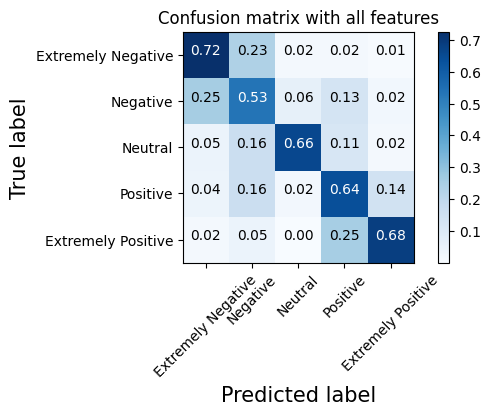

In [146]:
# compute the confusion matrix
cnf_matrix = confusion_matrix(y_test, max_indices)
# plot cnf_matrix
plt.figure(figsize=(6,4))
plot_confusion_matrix(cnf_matrix, classes=['Extremely Negative', 'Negative', 'Neutral', 'Positive', 'Extremely Positive'],
                        normalize=True,
                        title='Confusion matrix with all features')
# compute the classification report
print(classification_report(y_test, max_indices))

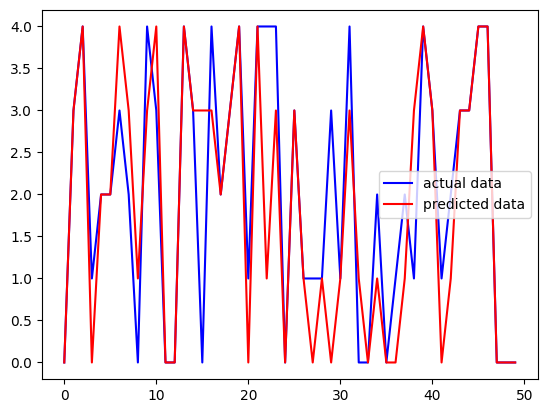

In [147]:
plt.plot(y_test[:50], c="b", label="actual data");
plt.plot(max_indices[:50], c="r", label="predicted data");
plt.legend()

In [148]:
test_pred = pd.get_dummies(y_pred_class)

y_test_dummies = pd.get_dummies(y_test)

# Print accuracy:
print("Accuracy: ", accuracy_score(y_test, max_indices))

#""" We don't use ROC AUC for our classification problem
# calculate AUC
#y_pred_prob = nb.predict_proba(xx)[:, 1]
print("ROC_AOC_Score: ", roc_auc_score(y_test_dummies, y_test_pred_class, multi_class="ovo"))

Accuracy:  0.6340179041600843
ROC_AOC_Score:  0.77711365416937


In [ ]:
"""
The confusion matrix is self explenatory.

Not perfect but goo result for accuracy, recall and precision.

This is a 5 class prediction models
"""

In [ ]:
"""
Fine tuning of the NN model would have improved the model accuracy as well as increasing the number of epochs.


"""

# 9. Use Lime to explain one text classification (from the test set)

In [149]:
"""
to clean the cache because my computer crashs

import gc
gc.collect()
"""

'\nto clean the cache because my computer crash\n\nimport gc\ngc.collect()\n'

In [150]:
y_test.unique()

array([0, 3, 4, 1, 2], dtype=int64)

In [151]:
y_test[2]

4

In [156]:
from lime import lime_text
from lime.lime_text import LimeTextExplainer
from sklearn.pipeline import make_pipeline

c = model

mystring = list(X_test_clean)[2] #Take a string from test instance

# my model need a padded input so i add those steps
lime_sequences = tokenizer.texts_to_sequences([mystring])

lime_data = pad_sequences(sequences=lime_sequences, maxlen=MAX_LEN, padding='pre', truncating='post', value=0.0)

print(c.predict(lime_data))

# my model need a padded input so i add the preprocessing steps inside a pipeline
# so that the lime explain_instance will be able to take a str as input
#and my new pipeline to process the str for padding and then for feeding the NN
'''
c = make_pipeline(
    (lambda x: tokenizer.texts_to_sequences([x]) ), 
    (lambda x: pad_sequences(sequences=x, maxlen=MAX_LEN, padding='pre', truncating='post', value=0.0) ),
    model.predict
    )

'''
def predict_wrapper(texts):
    sequences = tokenizer.texts_to_sequences(texts)
    padded_sequences = pad_sequences(sequences, maxlen=MAX_LEN, padding='pre', truncating='post', value=0.0)
    
    return c.predict(padded_sequences)

class_names = ['Extremely Negative', 'Negative', 'Neutral', 'Positive', 'Extremely Positive']

explainer = LimeTextExplainer()#class_names=class_names)

exp = explainer.explain_instance(mystring, predict_wrapper, num_features=10, labels=[1]) 

#exp.as_list()
exp.show_in_notebook()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[8.573947e-05 6.291416e-04 7.910537e-04 8.079505e-03 9.904146e-01]]
157/157 ━━━━━━━━━━━━━━━━━━━━ 43s 275ms/step


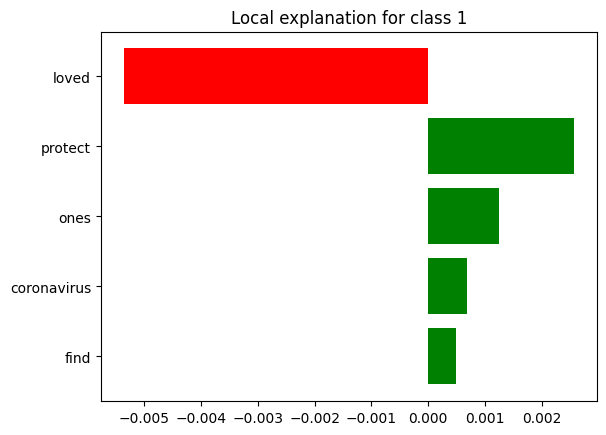

In [153]:
%matplotlib inline
fig = exp.as_pyplot_figure()

In [157]:
exp.as_list()

[('loved', -0.005356364039909045),
 ('protect', 0.002668417743672258),
 ('ones', 0.0014122849501656627),
 ('coronavirus', 0.0005829456193937574),
 ('find', 0.00034411359799494035)]

In [ ]:
"""
According to LIME,

For "find protect loved ones coronavirus"
 the model not predict "Negative" because of the word "loved".


However the words 'protect', 'ones', 'coronavirus' and 'find' push to predict "Negative".
But not enough.
"""

In [ ]:
break

# 10. Use Shapley to explain globally the text classification on the test set

In [ ]:
"""
This code gave me a bluescreen Windows error caused by a GPU misfunctionning

import shap

X_test_clean_fit = embedding_layer(test_data)

X_train_clean_fit = embedding_layer(train_data)

# filtering the data to the 50 most important features
X_test_nlp_samp_df = pd.DataFrame(shap.sample(X_test_clean_fit, 50).todense())
# we are using kmeans to summarize the ackground training data needed for shapley instead of using it all--> we
# we could instead of kmeans to sample some data points
x_summary = shap.kmeans(np.asarray(X_train_clean_fit.todense()), 10)
# Initialize a shapley kernel explainer, it needs the lgb_mdl.predict, a background training data,
shap_lgb_explainer = shap.KernelExplainer(model.predict,
                            x_summary)
# during the fitting, shapley regularizes the model with L1 such that it will only keep 20 features
shap_lgb_values_test = shap_lgb_explainer.shap_values(X_test_nlp_samp_df,
                                            l1_reg="num_features(20)")
shap.summary_plot(shap_lgb_values_test, X_test_nlp_samp_df,
            plot_type="dot", feature_names=vectorizer.get_feature_names_out())
"""

In [160]:
"""
test_data # takes more than 50h
test_data[:20] # takes 1:55:02 => i don't understand the gap between 10 and 20
test_data[:10] # takes 0:30:38
test_data[:3] # takes 0:02:00

this is because i try to explain my transformer
"""

array([[    0,     0,     0, ...,  6279,   302,    30],
       [    0,     0,     0, ...,   745,  1078,     5],
       [    0,     0,     0, ...,  1799,   792,     2],
       ...,
       [    0,     0,     0, ...,   123,   385,   752],
       [    0,     0,     0, ...,    49, 11953,     1],
       [    0,     0,     0, ...,   409,  1943,   116]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  0%|          | 0/10 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
659/659 ━━━━━━━━━━━━━━━━━━━━ 184s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
659/659 ━━━━━━━━━━━━━━━━━━━━ 184s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
659/659 ━━━━━━━━━━━━━━━━━━━━ 188s 285ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
659/659 ━━━━━━━━━━━━━━━━━━━━ 185s 281ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
659/659 ━━━━━━━━━━━━━━━━━━━━ 182s 276ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
659/659 ━━━━━━━━━━━━━━━━━━━━ 182s 276ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
659/659 ━━━━━━━━━━━━━━━━━━━━ 182s 276ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
659/659 ━━━━━━━━━━━━━━━━━━━━ 184s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
659/659 ━━━━━━━━━━━━━━━━━━━━ 184s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
659/659 ━━━━━━━━━━━━━━━━━━━━ 188s 285ms/step


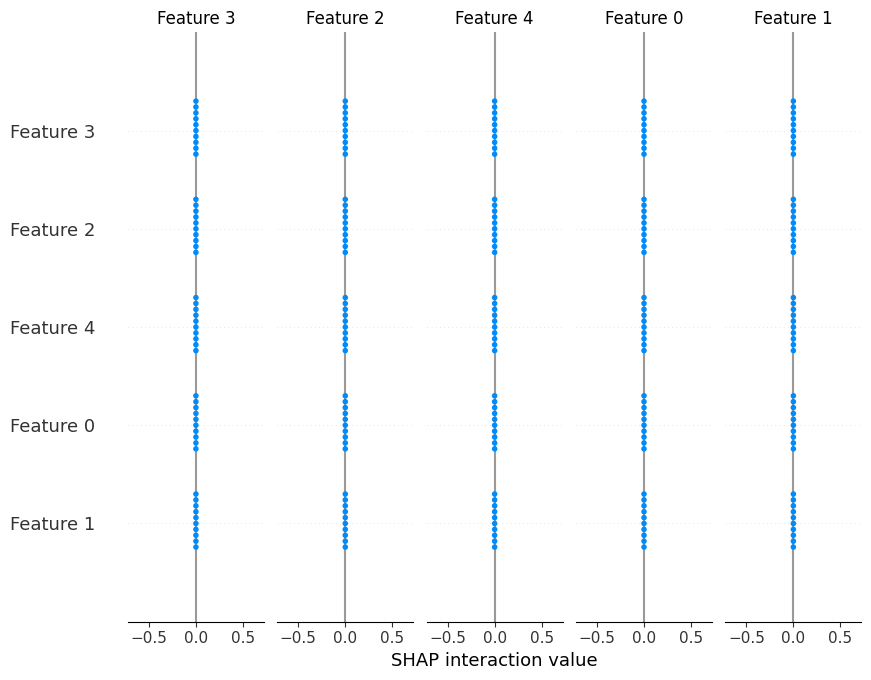

In [163]:
# ChatGPT helped because i tried to play with the function from last notebook
#but it made a bluescreen Windows error caused by a GPU misfunctionning

import shap

explainer = shap.KernelExplainer(model.predict, shap.sample(test_data[:10], 100))

shap_values = explainer.shap_values(shap.sample(test_data[:10], 100))

shap.summary_plot(shap_values, shap.sample(test_data[:10], 100))

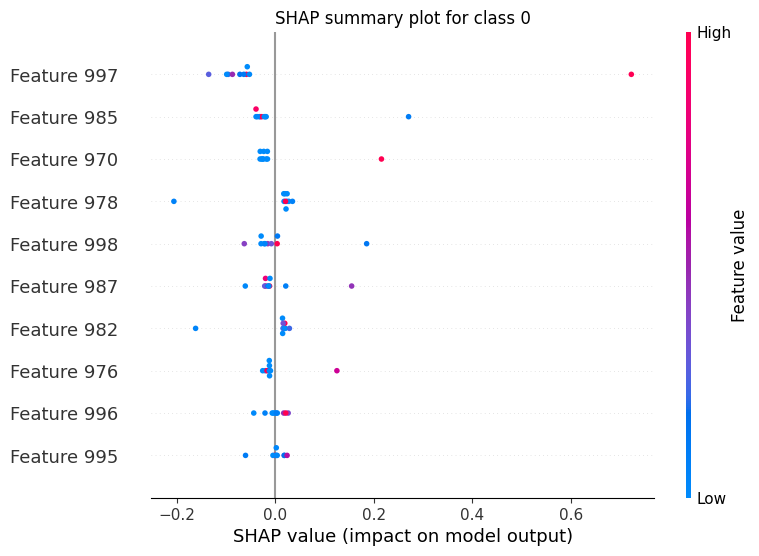

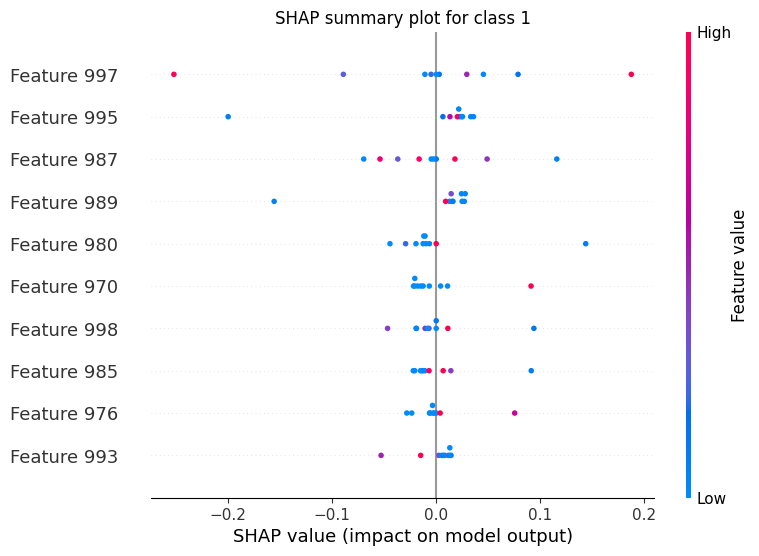

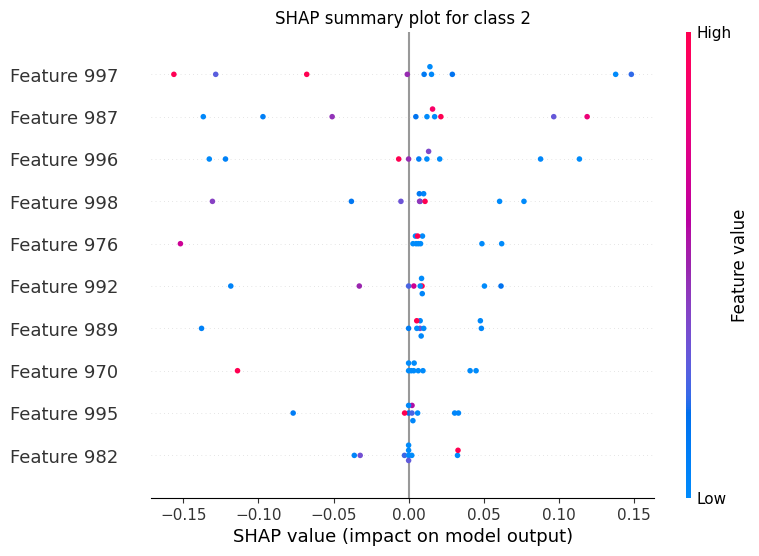

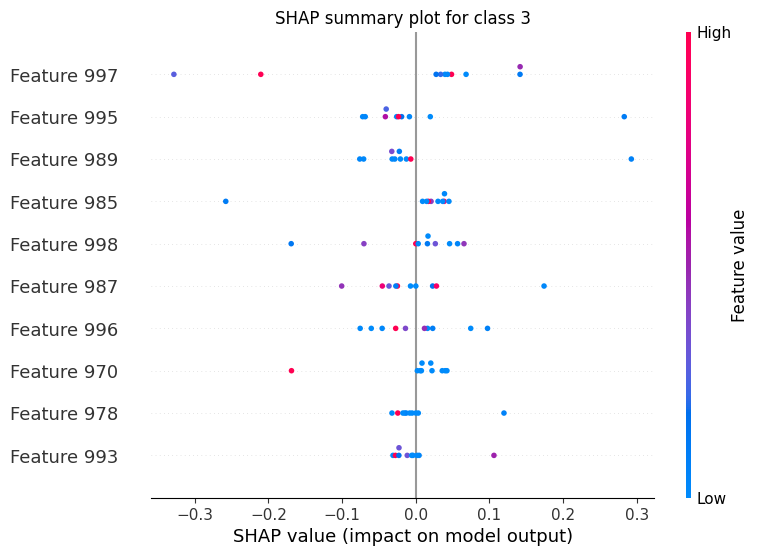

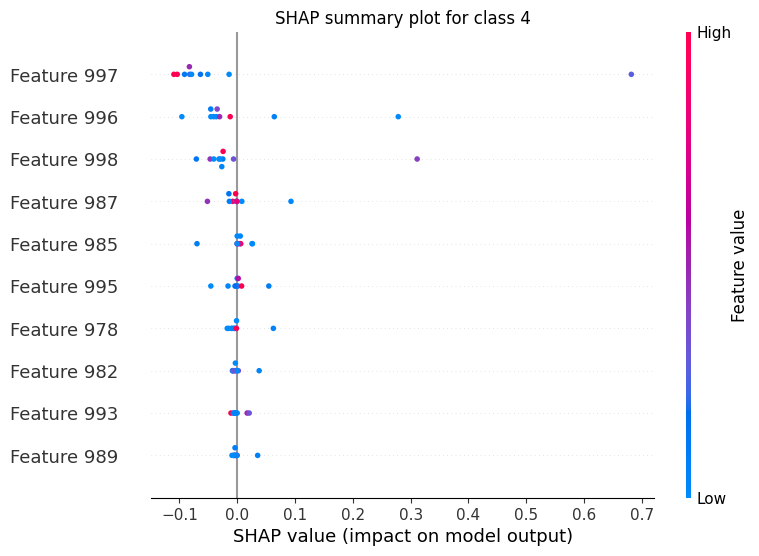

In [175]:
# with the help of a friend
for class_index in range(shap_values.shape[2]):
    # Extract SHAP values for the current class
    shap_values_class = shap_values[:, :, class_index]
    
    # Generate SHAP summary plot for the current class
    shap.summary_plot(shap_values_class, test_data[:10], max_display=10, show=False) #, feature_names=feature_name)
    
    # Add class label as title
    plt.title(f"SHAP summary plot for class {class_index}")
    
    # Show the plot
    plt.show()

In [ ]:
"""
{"Extremely Negative": 0,
                               "Negative":1,
                               "Neutral": 2,
                               "Positive": 3,
                               "Extremely Positive": 4
                               }
"""

"""
if it would have been with a simplier model like logreg

i would have computed all the test dataset and have a nice plot like in the homework

Interpretations:

Globally, the words have a positive impact on the model toward predicting Extremely Positive
whereas the words  push the predictions toward the other classes

Globally, the words have a positive impact on the model toward predicting Positive
whereas the words  push the predictions toward the other classes

Globally, the words have a positive impact on the model toward predicting Neutral
whereas the words  push the predictions toward the other classes

Globally, the words have a positive impact on the model toward predicting Negative
whereas the words  push the predictions toward the other classes

Globally, the words have a positive impact on the model toward predicting Extremely Negative
whereas the words  push the predictions toward the other classes

"""